#FINANCIAL FRAUD DETECTION

La urgencia por detectar fraudes en transacciones móviles de dinero ha llevado a una empresa del segmento Fintech a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para desarrollar un modelo de machine learning que pueda distinguir de manera precisa entre transacciones legítimas y fraudulentas, estableciendo así un estándar de seguridad en el sector financiero móvil global.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la detección de transacciones bancarias fraudulentas.

## 1. IMPORTANDO LIBRERÍAS Y DATASET

In [2]:
%%capture
!pip install -U imbalanced-learn
!pip install ydata-profiling
!pip install --user imblearn
!pip install polars
# https://docs.pola.rs/

In [3]:
## Instalando Java y Pysapark
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
# !tar xf spark-3.5.1-bin-hadoop3.tgz
# !pip install -q findspark pyspark

In [4]:
##Configurando variables de entorno - ejecución de Java y Pyspark
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [5]:
##Instalando las librerias a utilizar
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

# Monta tu Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# import findspark
# findspark.init()

# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('Spark_1').getOrCreate()

In [7]:
##Asignando los datos a un dataframe
df_banco = pl.read_csv('/content/drive/MyDrive/Colab Notebooks/PS_20174392719_1491204439457_log.csv')
df_banco.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0


In [8]:
df_banco.shape

(6362620, 11)

In [9]:
print(df_banco.head(5))

shape: (5, 11)
┌──────┬──────────┬──────────┬─────────────┬───┬─────────────┬─────────────┬─────────┬─────────────┐
│ step ┆ type     ┆ amount   ┆ nameOrig    ┆ … ┆ oldbalanceD ┆ newbalanceD ┆ isFraud ┆ isFlaggedFr │
│ ---  ┆ ---      ┆ ---      ┆ ---         ┆   ┆ est         ┆ est         ┆ ---     ┆ aud         │
│ i64  ┆ str      ┆ f64      ┆ str         ┆   ┆ ---         ┆ ---         ┆ i64     ┆ ---         │
│      ┆          ┆          ┆             ┆   ┆ f64         ┆ f64         ┆         ┆ i64         │
╞══════╪══════════╪══════════╪═════════════╪═══╪═════════════╪═════════════╪═════════╪═════════════╡
│ 1    ┆ PAYMENT  ┆ 9839.64  ┆ C1231006815 ┆ … ┆ 0.0         ┆ 0.0         ┆ 0       ┆ 0           │
│ 1    ┆ PAYMENT  ┆ 1864.28  ┆ C1666544295 ┆ … ┆ 0.0         ┆ 0.0         ┆ 0       ┆ 0           │
│ 1    ┆ TRANSFER ┆ 181.0    ┆ C1305486145 ┆ … ┆ 0.0         ┆ 0.0         ┆ 1       ┆ 0           │
│ 1    ┆ CASH_OUT ┆ 181.0    ┆ C840083671  ┆ … ┆ 21182.0     ┆ 0.0         ┆

In [10]:
## Utf8 --> string
## Int and Float as usual
print(df_banco.dtypes)

[Int64, Utf8, Float64, Utf8, Float64, Float64, Utf8, Float64, Float64, Int64, Int64]


## 2. PREPROCESAMIENTO DE DATOS

* En este paso vamos a realizar el análisis del dataset y realizar el preprocesamiento de datos. Para esto verificaremos la presencia de datos nulos y/o faltantes, asicomo presencia de datos duplicados.

* Analizaremos que columnas son importantes para nuestros posteriores análisis y cuales descartaremos. Adicionalmente se evaluará el tratamiento de variables categóricas con el método de One-Hot encoding y creación de nuevas variables utilizando el Feature Engineering de las variables.

## 2.1 Verificación Inicial de nuestro dataset

In [11]:
## Visión general del dataset
print(df_banco.shape)
print("Número de filas:", df_banco.shape[0])
print("Número de columnas:", df_banco.shape[1])
df_banco.describe()[1,:]

(6362620, 11)
Número de filas: 6362620
Número de columnas: 11


describe,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
str,f64,str,f64,str,f64,f64,str,f64,f64,f64,f64
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0


**<ins> Observaciones:</ins>**
* Se observa que tenemos 11 columnas y 6362620 filas
* Tenemos 3 tipos de datos: **Integer, Float y str**
* No se observa la presencia de datos nulos o faltantes. Se revisará posteriormente
* Nuestra variable objetivo es la variable **"isFraud"**

In [15]:
## Revisando presencia de datos duplicados
# df_banco.to_pandas().duplicated().sum()
df_banco.filter(df_banco.is_unique()).is_duplicated().to_pandas().sum()

0

* No existen datos duplicados en nuestro dataset inicial

In [17]:
## Validando valores nulos o faltantes
# df_banco.to_pandas().isnull().sum()
df_banco.null_count()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0


* No se visualizan datos nulos en nuestras variables

## 2.2 Verificando las categorías existentes en nuestras variables categóricas

In [18]:
## Consiguiendo solo las variables categóricas

# Filtrar columnas que son de tipo 'Utf8' (equivalente a str en Polars)
variables_categoricas = [col for col, dtype in df_banco.describe().schema.items() if dtype == pl.Utf8][1:]
variables_categoricas

['type', 'nameOrig', 'nameDest']

In [19]:
for i in variables_categoricas:
    print('*****'*5)
    print(f'Las categorías para la variable -{i}-  son: {df_banco.select(i).unique()} \n')
    print('*****'*5)

*************************
Las categorías para la variable -type-  son: shape: (5, 1)
┌──────────┐
│ type     │
│ ---      │
│ str      │
╞══════════╡
│ CASH_IN  │
│ DEBIT    │
│ PAYMENT  │
│ CASH_OUT │
│ TRANSFER │
└──────────┘ 

*************************
*************************
Las categorías para la variable -nameOrig-  son: shape: (6_353_307, 1)
┌─────────────┐
│ nameOrig    │
│ ---         │
│ str         │
╞═════════════╡
│ C1480047380 │
│ C2013562807 │
│ C127285084  │
│ C1741044567 │
│ …           │
│ C59237338   │
│ C121528561  │
│ C1003890696 │
│ C1697771946 │
└─────────────┘ 

*************************
*************************
Las categorías para la variable -nameDest-  son: shape: (2_722_362, 1)
┌─────────────┐
│ nameDest    │
│ ---         │
│ str         │
╞═════════════╡
│ M55798123   │
│ M224189520  │
│ M214460497  │
│ M558934492  │
│ …           │
│ M1807596163 │
│ M1747502806 │
│ M1838569047 │
│ M1492746119 │
└─────────────┘ 

*************************


* Notamos que la variable **'type'**, nos representa el tipo de operación realizada, y existen 5 categorias.
* Por otro lado, las variables categóricas **'nameOrig'** y **'nameDest'**, son códigos que representan clientes y por consiguiente tienen muchas categorías, se evaluará posteriormente la creación de una nueva variable para obtenerle más valor.

## 2.3 Creación de Nuevas variables: Feature Engineering

## 2.3.1 <ins> Variable **'type'**:</ins>

* Creamos una nueva variable, llamada **"type_2"**, uniendo las primeras letras de las dos columnas, **"nameOrig"** y **"nameDest"**, los cuales nos representan el cliente que inicio la operación y el cliente que recibió la transacción

In [20]:
## Utilizamos expresiones regulares para lograr este resultado - También colocamos otra forma de hacerlo

# df_banco['type_2'] = df_banco['nameOrig'].apply(lambda x:x[0]) + df_banco['nameDest'].apply(lambda x:x[0])
# df_banco['type_2'] = df_banco['nameOrig'].apply(lambda x:re.search('[A-Za-z]', x).group()) + df_banco['nameDest'].apply(lambda x:re.search('[A-Za-z]', x).group())
# df_banco['type_2']

df_banco = df_banco.with_columns((pl.col("nameOrig").apply(lambda x:x[0]) + pl.col("nameDest").apply(lambda x:x[0])).alias("type_2"))

In [21]:
## Validamos que se haya creado correctamente la nueva variable
df_banco.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM"""
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM"""
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC"""
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC"""
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM"""


## 2.3.2 <ins> Variable **'Step'**:</ins>

* Tenemos como información que esta variable **'step'**, nos representa una unidad de tiempo, donde 1 step equivale a 1 hora y asi sucesivamente.
* Por consiguiente, agruparemos esta variable cada 24 horas para crear una nueva variable que nos represente los días.

In [22]:
## Verificando todos los valores únicos de la variable 'step'
df_banco.select('step').unique().to_pandas().shape[0]

743

In [23]:
## Creamos una nueva columna 'day', la cual agrupará cada 24 horas los steps
df_banco = df_banco.with_columns((pl.col('step').apply(lambda x: (x//24 +1))).alias('day'))
df_banco.select('day').to_pandas()

,day
0,1
1,1
2,1
3,1
4,1
...,...
6362615,31
6362616,31
6362617,31
6362618,31


In [24]:
## Validamos que se haya creado correctamente la nueva variable
df_banco.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2,day
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str,i64
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM""",1
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM""",1
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC""",1
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC""",1
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM""",1


In [25]:
## Función para asignar la parte del día
def part_of_the_day(hora):
    hora_del_dia = hora % 24
    if 6 <= hora_del_dia < 12:
        return 'mañana'
    elif 12 <= hora_del_dia < 18:
        return 'tarde'
    elif 18 <= hora_del_dia < 24:
        return 'noche'
    else:
        return 'madrugada'

## Creamos la nueva columna con las partes del día correspondientes: 'mañana' / 'tarde' / 'noche' / 'madrugada'
df_banco = df_banco.with_columns((pl.col('step').apply(part_of_the_day)).alias('part_of_the_day'))
df_banco.select('part_of_the_day').to_pandas()

,part_of_the_day
0,madrugada
1,madrugada
2,madrugada
3,madrugada
4,madrugada
...,...
6362615,noche
6362616,noche
6362617,noche
6362618,noche


In [26]:
## Validamos que se haya creado correctamente la nueva variable
df_banco

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2,day,part_of_the_day
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str,i64,str
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC""",1,"""madrugada"""
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC""",1,"""madrugada"""
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7817.71,"""C90045638""",53860.0,46042.29,"""M573487274""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7107.77,"""C154988899""",183195.0,176087.23,"""M408069119""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7861.64,"""C1912850431""",176087.23,168225.59,"""M633326333""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",4024.36,"""C1265012928""",2671.0,0.0,"""M1176932104""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""


## 2.4 Eliminando Variables no relevantes


* Luego de analizar las variables y el origen de nuestro dataset, existe una nota importante a tener en cuenta, donde nos indica que las transacciones las cuales son detectadas como fraude son canceladas, debido a esto para nuestro análisis de detección de fraude, hay algunas columnas que no deben ser consideras, las cuales serian: **'oldbalanceOrg','newbalanceOrig','oldbalanceDest' y 'newbalanceDest'**.

* Por otro lado, consideramos que las columnas **"nameOrig"** y **"nameDest"**, al ser columnas que no tienen un patrón definido y solo representan los códigos de los clientes tanto que realizan un intercambio monetario, no serian relevantes para los análisis. Sin embargo, ya le sacamos el provecho necesario ya que creamos una nueva variable con la combinación de estas dos, la que consideramos muy importante, ya que las iniciales de los registros en estas variables nos indican si es el cliente de origen (C) o el cliente final (M).

* Por ultimo, la variable **"isFlaggedFraud"**, si bien nos indica cuando una transacción es fraudulenta, es para transacciones muy grandes de dinero, consideramos que esto ya esta incluido en la variable **"isFraud"**, y podría generar mucha correlación, la cual es más completa porque tiene todos los posibles casos. Por esta razón decidimos prescindir de esta variable.

In [159]:
## Creamos un backup de nuestro dataframe base
df_banco_new = df_banco.clone()

## Eliminamos las variables consideradas no relevantes para el análisis
df_banco_new = df_banco_new.drop(['nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud'])
df_banco_new

step,type,amount,isFraud,type_2,day,part_of_the_day
i64,str,f64,i64,str,i64,str
1,"""PAYMENT""",9839.64,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",1864.28,0,"""CM""",1,"""madrugada"""
1,"""TRANSFER""",181.0,1,"""CC""",1,"""madrugada"""
1,"""CASH_OUT""",181.0,1,"""CC""",1,"""madrugada"""
1,"""PAYMENT""",11668.14,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7817.71,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7107.77,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7861.64,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",4024.36,0,"""CM""",1,"""madrugada"""


## 2.5 Encoding de Variables categóricas

In [160]:
# Creamos variables dummy para la columna 'type' y 'type_2 y 'part_of_the_day' con nombres específicos
# https://docs.pola.rs/docs/python/version/0.18/reference/dataframe/api/polars.DataFrame.to_dummies.html

df_banco_new = df_banco_new.to_dummies('type')
df_banco_new = df_banco_new.to_dummies('type_2')
df_banco_new = df_banco_new.to_dummies('part_of_the_day')

# Eliminamos las columnas originales
df_banco_new = df_banco_new.drop(["type", "type_2", "part_of_the_day"])

In [161]:
df_banco_new.head(10)

step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_madrugada,part_of_the_day_mañana,part_of_the_day_noche,part_of_the_day_tarde
i64,u8,u8,u8,u8,u8,f64,i64,u8,u8,i64,u8,u8,u8,u8
1,0,0,0,1,0,9839.64,0,0,1,1,1,0,0,0
1,0,0,0,1,0,1864.28,0,0,1,1,1,0,0,0
1,0,0,0,0,1,181.0,1,1,0,1,1,0,0,0
1,0,1,0,0,0,181.0,1,1,0,1,1,0,0,0
1,0,0,0,1,0,11668.14,0,0,1,1,1,0,0,0
1,0,0,0,1,0,7817.71,0,0,1,1,1,0,0,0
1,0,0,0,1,0,7107.77,0,0,1,1,1,0,0,0
1,0,0,0,1,0,7861.64,0,0,1,1,1,0,0,0
1,0,0,0,1,0,4024.36,0,0,1,1,1,0,0,0


## 2.5.1 Validando nuestro nuevo dataset: Nulos y duplicados

In [162]:
## Validando presencia de datos nulos
df_banco_new.null_count()

step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_madrugada,part_of_the_day_mañana,part_of_the_day_noche,part_of_the_day_tarde
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* No hay presencia de datos nulos en el nuevo dataframe

In [163]:
## Validando presencia de datos duplicados
df_banco_new.is_duplicated().to_pandas().sum()

12101

In [164]:
print(f'Existen {df_banco_new.is_duplicated().to_pandas().sum()} valores duplicados después de realizar la transformación con valores dummies')
print(f'Nuestro dataset antes de la depuración de duplicados es de dimensión {df_banco_new.shape}')
df_banco_new = df_banco_new.filter(df_banco_new.is_unique())  ## Filtrando los duplicados

print('\n')
print('***** Realizamos la depuración de duplicados *****')
print(f'Ahora existen {df_banco_new.is_duplicated().to_pandas().sum()} valores duplicados')
print(f'La nueva dimensión de nuestro dataset, después de la depuración de duplicados: {df_banco_new.shape}')

Existen 12101 valores duplicados después de realizar la transformación con valores dummies
Nuestro dataset antes de la depuración de duplicados es de dimensión (6362620, 15)


***** Realizamos la depuración de duplicados *****
Ahora existen 0 valores duplicados
La nueva dimensión de nuestro dataset, después de la depuración de duplicados: (6350519, 15)


## 2.6 Nuevo Dataframe Procesado

In [165]:
## Procesamiento conseguido
df_banco_new.head()

step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_madrugada,part_of_the_day_mañana,part_of_the_day_noche,part_of_the_day_tarde
i64,u8,u8,u8,u8,u8,f64,i64,u8,u8,i64,u8,u8,u8,u8
1,0,0,0,1,0,9839.64,0,0,1,1,1,0,0,0
1,0,0,0,1,0,1864.28,0,0,1,1,1,0,0,0
1,0,0,0,0,1,181.0,1,1,0,1,1,0,0,0
1,0,1,0,0,0,181.0,1,1,0,1,1,0,0,0
1,0,0,0,1,0,11668.14,0,0,1,1,1,0,0,0


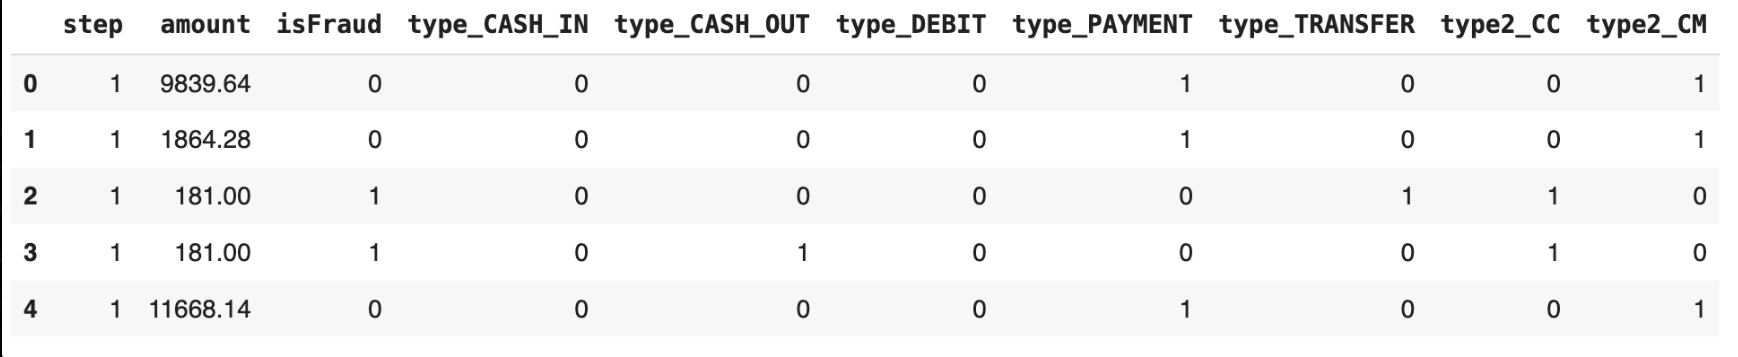

## 3. EXPLORACIÓN DE DATOS

## 3.1 Análisis Univariado

## 3.1.1 <ins>Análisis Univariado: target</ins>

In [166]:
df_grafico = df_banco_new.select('isFraud').to_pandas().value_counts().reset_index()
df_grafico

,isFraud,count
0,0,6342471
1,1,8048


In [167]:
df_banco_new.select('isFraud').to_pandas().shape[0]

6350519

In [168]:
f"{round(df_banco_new.select('isFraud').to_pandas().value_counts()[0]*100/df_banco_new.select('isFraud').shape[0],2)}%"

'99.87%'

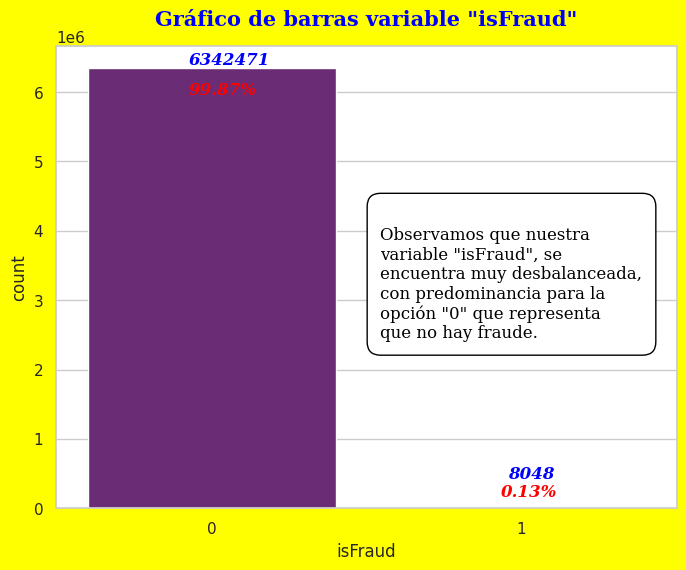

In [169]:
plt.figure(figsize=(8,6))
sns.barplot(x="isFraud", y="count", data= df_grafico, palette = 'magma')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.figtext(0.29, 0.85, 6342471, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'blue'})
plt.figtext(0.29, 0.80, f"{round(df_banco_new.select('isFraud').to_pandas().value_counts()[0]*100/df_banco_new.select('isFraud').shape[0],2)}%",
            fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'red'})

plt.figtext(0.69, 0.16, 8048, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'blue'})
plt.figtext(0.68, 0.13, f"{round(df_banco_new.select('isFraud').to_pandas().value_counts()[1]*100/df_banco_new.select('isFraud').shape[0],2)}%",
            fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'italic', 'fontweight': 'heavy', 'color': 'red'})

# Añadir texto de conclusión
conclusion_text = '''
Observamos que nuestra
variable "isFraud", se
encuentra muy desbalanceada,
con predominancia para la
opción "0" que representa
que no hay fraude.'''

plt.figtext(0.53, 0.5, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8'))
# plt.text(0.5, 0.95, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'},
#         va='center', ha='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('isFraud')
plt.title('Gráfico de barras variable "isFraud"', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.show()

## 3.1.2 <ins>Análisis Univariado: Otras variables</ins>

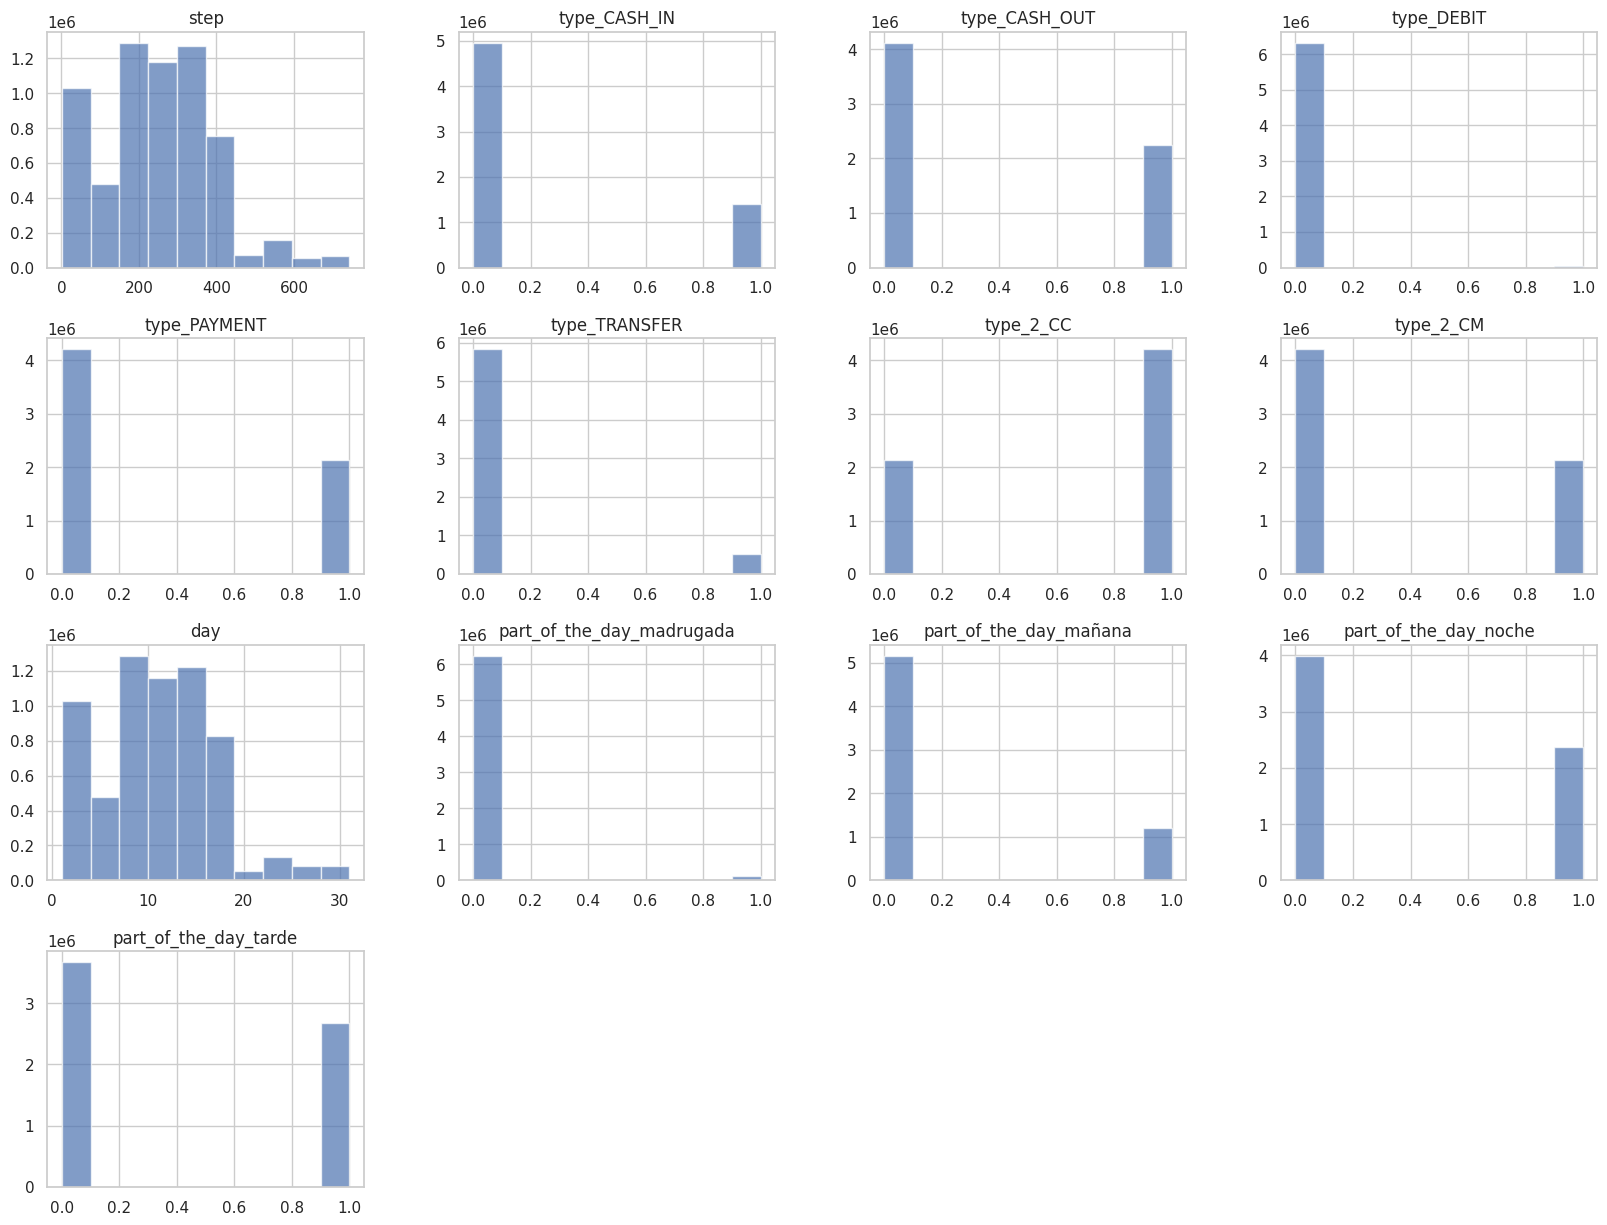

In [170]:
# Dibujamos gráfica de frecuencia demás variables
plt.rcParams['figure.figsize'] = [20,15];
sns.set(style="whitegrid")
df_banco_new.drop(['amount', 'isFraud']).to_pandas().hist(alpha=0.7)
plt.show()

> * Se observa que mayormente las transacciones empiezan después de las 6:00 horas, en la mañana.
> * De lo deducido anteriormente, también podemos concluir que en la madrugada las transacciones son muchisimo menores que en el día.
> * Gran cantidad de transacciones se realizan en las tardes y noches.
> * De los Histogramas, con respecto a los métodos de transacciones, deducimos que los tipos PAYMENT y CASH_OUT son los más utilizado con poco más de 2000000 de transacciones.
> * El tipo DEBIT, es la transacción que menos registros se consiguen, se podría decir que no es representativo, muy pocas transacciones comparados con los demás.
> * El tipo CASH-IN, tiene aproximadamente 1500000 transacciones.
> * El tipo TRANSFER, solo tiene aproximadamente 500000 transacciones.
> * De las dos variables CC y CM, se concluye que tenemos más registros de la variable tipo CC, con un poco más de 6000000 transacciones. El resto de transacciones es de tipo CM.


In [ ]:
# ## Gráfico de barras
# for i in df_banco_new.drop(columns=['amount', 'isFraud']).columns:
#     df_banco_new[i].plot(kind='hist', title= i, bins=15)
#     plt.show()

In [39]:
# df_banco.groupby('type')['type'].count()
df_transaccion = df_banco.groupby('type').count().to_pandas()
df_transaccion

,type,count
0,DEBIT,41432
1,TRANSFER,532909
2,CASH_IN,1399284
3,PAYMENT,2151495
4,CASH_OUT,2237500


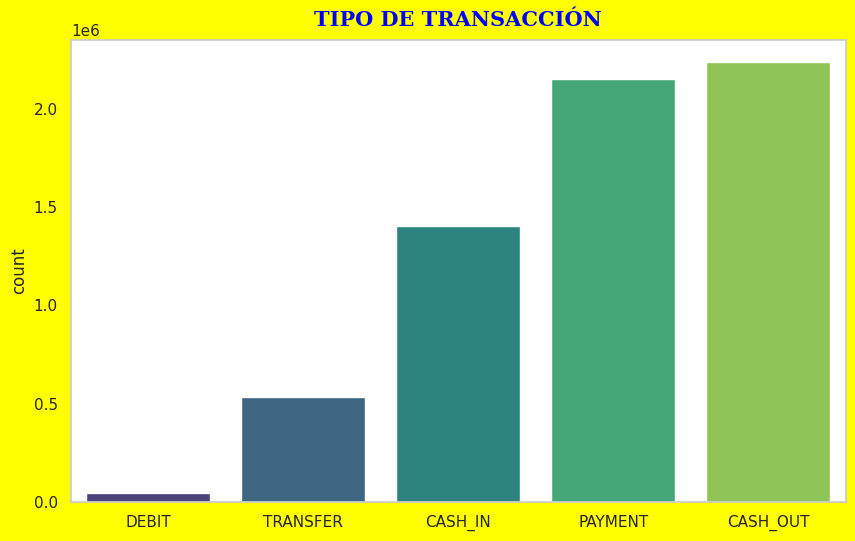

In [40]:
## Grafico de barras de los tipos de transacción
plt.figure(figsize=(10,6))
sns.barplot(x='type', y = 'count', data = df_transaccion, palette = 'viridis')
plt.xlabel('')
plt.title('TIPO DE TRANSACCIÓN', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

In [41]:
df_intervalo = df_banco.groupby('part_of_the_day').count().to_pandas()
df_intervalo

,part_of_the_day,count
0,noche,2365669
1,mañana,1194562
2,tarde,2689784
3,madrugada,112605


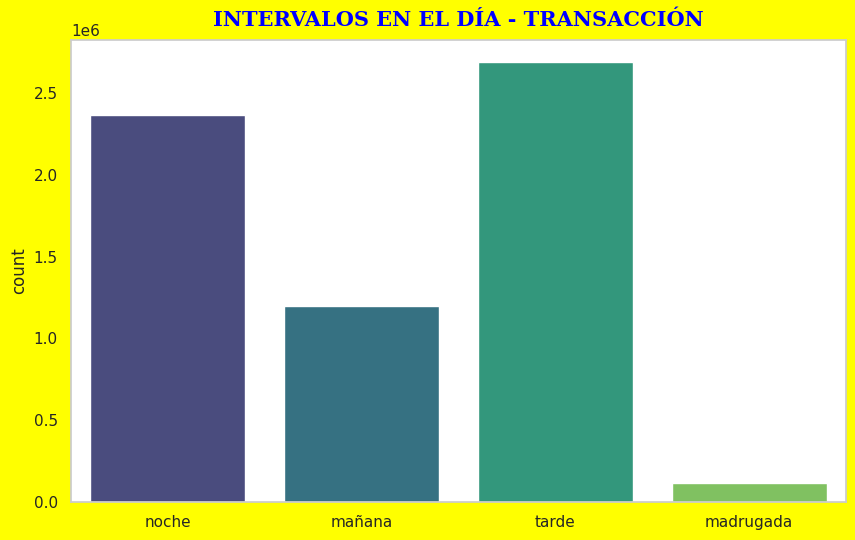

In [42]:
## Grafico de barras de los intervalos en el día
plt.figure(figsize=(10,6))
sns.barplot(x='part_of_the_day',y='count',data = df_intervalo, palette = 'viridis')
plt.xlabel('')
plt.title('INTERVALOS EN EL DÍA - TRANSACCIÓN', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

In [43]:
df_dias = df_banco.groupby('day').count().to_pandas()
df_dias

,day,count
0,5,12995
1,3,6749
2,23,50432
3,16,375514
4,12,349800
5,27,8574
6,15,400706
7,17,421098
8,13,429335
9,2,452761


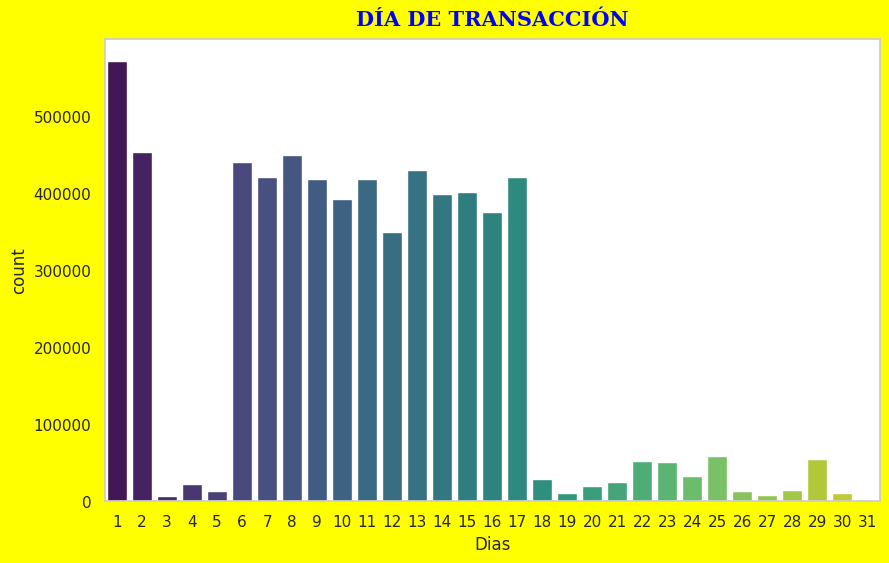

In [44]:
## Grafico de barras día de transacción
plt.figure(figsize=(10,6))
sns.barplot(x='day',y='count',data= df_dias, palette = 'viridis')
plt.xlabel('Dias')
plt.title('DÍA DE TRANSACCIÓN', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

In [45]:
df_transaccion_2 = df_banco.groupby('type_2').count().to_pandas()
df_transaccion_2

,type_2,count
0,CM,2151495
1,CC,4211125


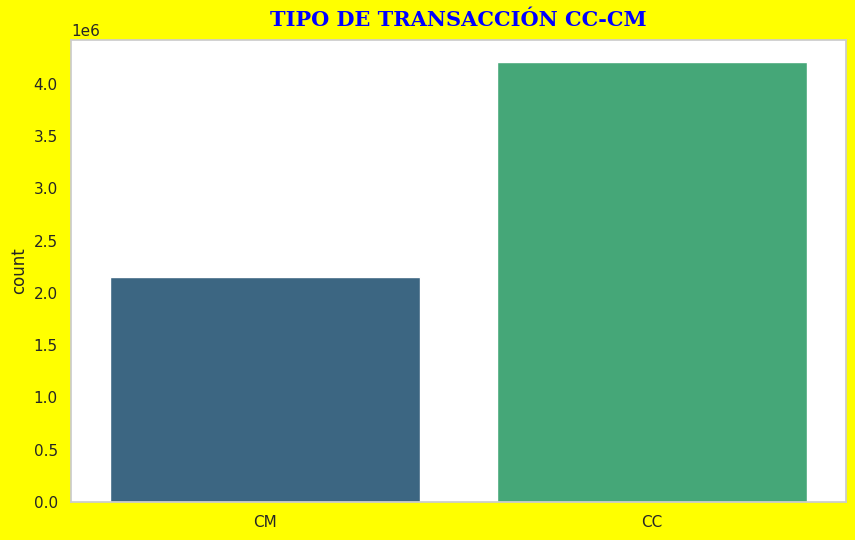

In [46]:
## Grafico de barras transacción CC o CM
plt.figure(figsize=(10,6))
sns.barplot(x='type_2',y='count',data= df_transaccion_2, palette = 'viridis')
plt.xlabel('')
plt.title('TIPO DE TRANSACCIÓN CC-CM', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

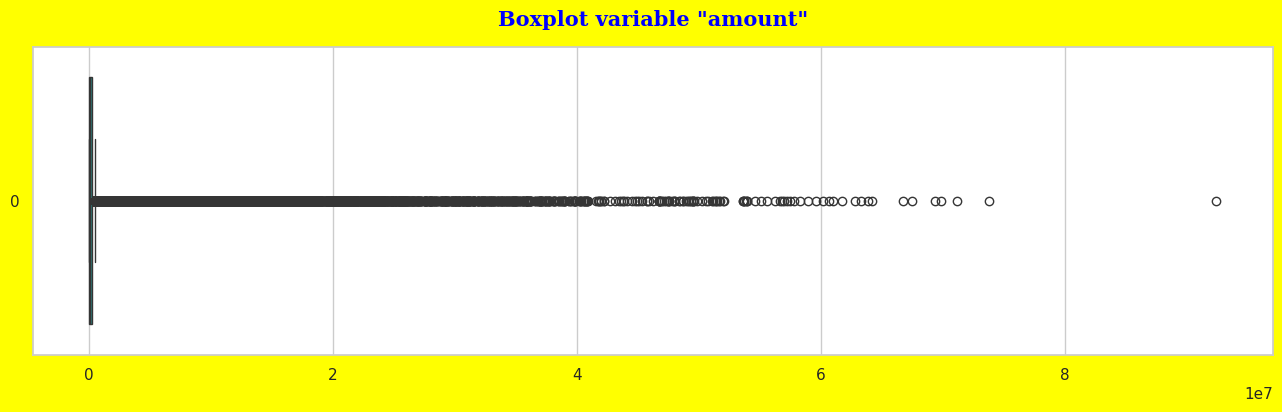

In [48]:
## Gráfico Boxplot -  Variable 'amount'

plt.figure(figsize=(16,4))
sns.boxplot(df_banco_new.select('amount'), orient='h', palette = 'viridis')

# # Añadir formateo al eje Y con números enteros y "K" para miles
# def mil_formatter(x, _):
#     return f'{int(x/1e6)}M'
# plt.gca().yaxis.set_major_formatter(FuncFormatter(mil_formatter))

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# plt.xlabel('amount (Millones MM)')
plt.title('Boxplot variable "amount"', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.show()

> * Nuestra variable 'amount', nos representa el monto de cada transacción, notamos que hay montos muy elevados, pero que la mayoría de montos muy menores, lo que nos hace notar la presencia de valores atípicos en nuestra gráfica de boxplot. Esto vamos a analizarlo, con la finalidad de ver si es factible poder realizar el tratamiento de estos valores atípicos, con la finalidad de no perder mucho valor.

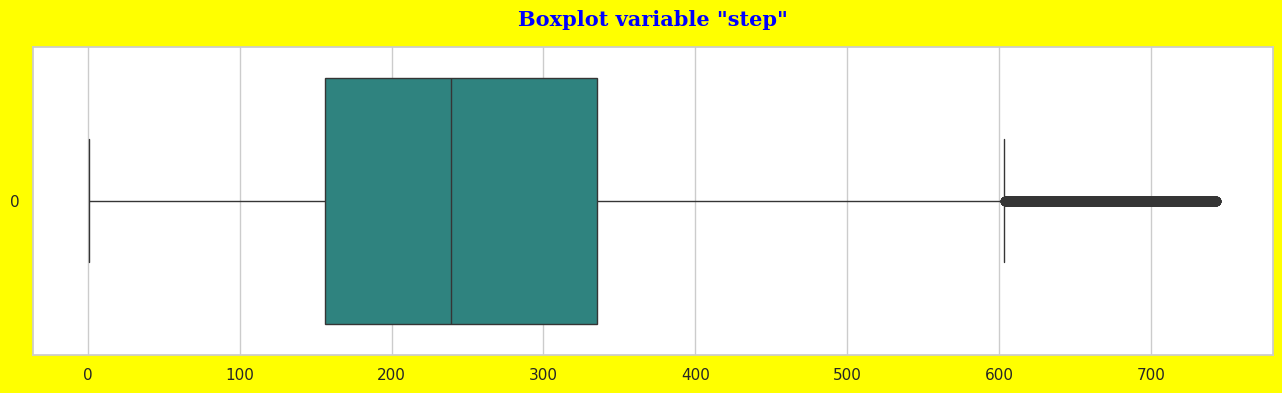

In [49]:
plt.figure(figsize=(16,4))
sns.boxplot(df_banco_new.select('step'), orient='h', palette = 'viridis')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# plt.xlabel('amount (Millones MM)')
plt.title('Boxplot variable "step"', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.show()

* Si bien notamos que en la varaible **'step'**, tenemos presencia de atípicos, no podemos manejar la imputación de los mismos debido a que es un indicador de tiempo en progresión. Inclusive estamos evaluando la posibilidad de prescindir de esta variable ya que hemos conseguido crear nuevas variables a partir de esta.

## <ins>Imputando valores Atípicos</ins>

* Los valores Atípicos que poseemos en la variable 'amount', pueden generarnos ciertos sesgos durante nuestra evaluación del modelo, asimismo pueden distorsionar la distribución de los datos, y darnos menos robustez en nuestros algoritmos de machine learning. Debido a todo esto, decidimos proceder con la imputación de estos valores Atípicos.
* Realizaremos la imputación con el método de Truncamiento de Percentiles.

In [50]:
## Verificando con el método describe la presencia de valores atípicos en nuestras variables.
df_banco_new.describe().to_pandas()

,describe,step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_madrugada,part_of_the_day_mañana,part_of_the_day_noche,part_of_the_day_tarde
0,count,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06,6.350519e+06
1,null_count,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,mean,2.433990e+02,2.202491e-01,3.522089e-01,6.522931e-03,3.375778e-01,8.344137e-02,1.753265e+05,1.267298e-03,6.624222e-01,3.375778e-01,1.050329e+01,1.771650e-02,1.878664e-01,3.718280e-01,4.225891e-01
3,std,1.423685e+02,4.144146e-01,4.776587e-01,8.050083e-02,4.728838e-01,2.765482e-01,5.643790e+05,3.557657e-02,4.728838e-01,4.728838e-01,5.923629e+00,1.319190e-01,3.906055e-01,4.832929e-01,4.939712e-01
4,min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,25%,1.560000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.343720e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,50%,2.390000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.503816e+04,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,75%,3.350000e+02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.087005e+05,0.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
8,max,7.430000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.244552e+07,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


* Tal como se habia observado en el gráfico de boxplot, la variable amount tiene presencia de valores atípicos los cuales realizaremos el tratamiento.

In [51]:
## verificando percentiles por la parte inferior
df_banco_new.select(['amount', 'step']).describe(percentiles=[0.01,0.025,0.05,0.1,0.5,0.75]).to_pandas()

,describe,amount,step
0,count,6.350519e+06,6.350519e+06
1,null_count,0.000000e+00,0.000000e+00
2,mean,1.753265e+05,2.433990e+02
3,std,5.643790e+05,1.423685e+02
4,min,0.000000e+00,1.000000e+00
5,1%,4.509000e+02,9.000000e+00
6,2%,1.119520e+03,1.200000e+01
7,5%,2.231660e+03,1.600000e+01
8,10%,4.516150e+03,3.500000e+01
9,50%,7.503816e+04,2.390000e+02


In [52]:
## verificando percentiles por la parte superior
df_banco_new.select(['amount', 'step']).describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.98,0.99]).to_pandas()

,describe,amount,step
0,count,6.350519e+06,6.350519e+06
1,null_count,0.000000e+00,0.000000e+00
2,mean,1.753265e+05,2.433990e+02
3,std,5.643790e+05,1.423685e+02
4,min,0.000000e+00,1.000000e+00
5,50%,7.503816e+04,2.390000e+02
6,75%,2.087005e+05,3.350000e+02
7,90%,3.648688e+05,3.990000e+02
8,95%,5.164060e+05,4.920000e+02
9,98%,8.447536e+05,5.850000e+02


* Observamos que hay muchos valores atípicos en la parte superior para la variable 'amount', por convención realizaremos el análisis con el $IQR = Q3 - Q1$ . De esta manera, nuestro nuevo límite de truncamiento superior será el  $P75 + 1.5*IQR$

In [53]:
list(df_banco_new.select('amount').describe(percentiles=[0.25,0.75]).to_pandas().iloc[5:7,:]['amount'])

[13437.2, 208700.55]

In [54]:
## Consiguiendo el límite de truncamiento superior
p25 = list(df_banco_new.select('amount').describe(percentiles=[0.25,0.75]).to_pandas().iloc[5:7,:]['amount'])[0]
p75 = list(df_banco_new.select('amount').describe(percentiles=[0.25,0.75]).to_pandas().iloc[5:7,:]['amount'])[1]
IQR = p75 - p25
LTS = p75 + 1.5*IQR  ## Límite de Truncamiento Superior

In [55]:
## Valor percentil mínimo
pmin = list(df_banco_new.select('amount').describe().to_pandas().iloc[4:5,:]['amount'])[0]
pmin

0.0

In [56]:
## Imputando los valores con la función clip, acotamos entre los percentiles seleccionados
# df_banco_new['amount'] = np.clip(df_banco_new['amount'],pmin,LTS)
# Aplicar clip a la columna 'amount'
df_banco_new = df_banco_new.with_columns(pl.col("amount").apply(lambda x: min(max(x, pmin), LTS)).alias("amount"))

In [57]:
## Veamos los cambios en la distribución
df_banco_new.select(['amount', 'step']).describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.98,0.99]).to_pandas()

,describe,amount,step
0,count,6.350519e+06,6.350519e+06
1,null_count,0.000000e+00,0.000000e+00
2,mean,1.322395e+05,2.433990e+02
3,std,1.460618e+05,1.423685e+02
4,min,0.000000e+00,1.000000e+00
5,50%,7.503816e+04,2.390000e+02
6,75%,2.087005e+05,3.350000e+02
7,90%,3.648688e+05,3.990000e+02
8,95%,5.015956e+05,4.920000e+02
9,98%,5.015956e+05,5.850000e+02


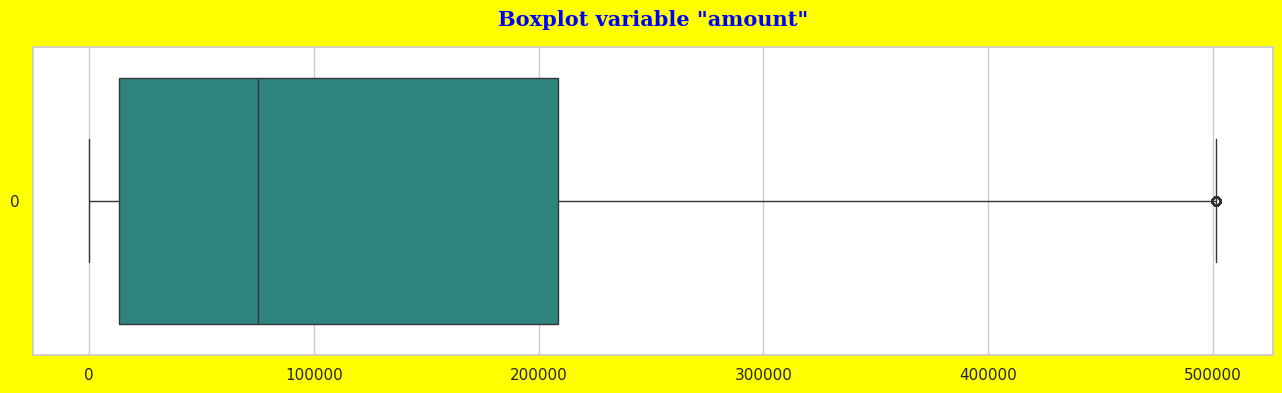

In [58]:
## Gráfico Boxplot
plt.figure(figsize=(16,4))
sns.boxplot(df_banco_new.select('amount'), orient='h', palette = 'viridis')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# plt.xlabel('amount (Millones MM)')
plt.title('Boxplot variable "amount"', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.show()

* Validamos en nuestro nuevo gráfico de boxplot, que ya no tenemos la presencia de atípicos que teniamos inciialmente. De esta manera podremos manipular la data de mejor manera, evitando algun sesgo y haciendo más robusto nuestros modelos.

## 3.2 Análisis Bivariado

In [59]:
df_banco

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2,day,part_of_the_day
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str,i64,str
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC""",1,"""madrugada"""
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC""",1,"""madrugada"""
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7817.71,"""C90045638""",53860.0,46042.29,"""M573487274""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7107.77,"""C154988899""",183195.0,176087.23,"""M408069119""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7861.64,"""C1912850431""",176087.23,168225.59,"""M633326333""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",4024.36,"""C1265012928""",2671.0,0.0,"""M1176932104""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""


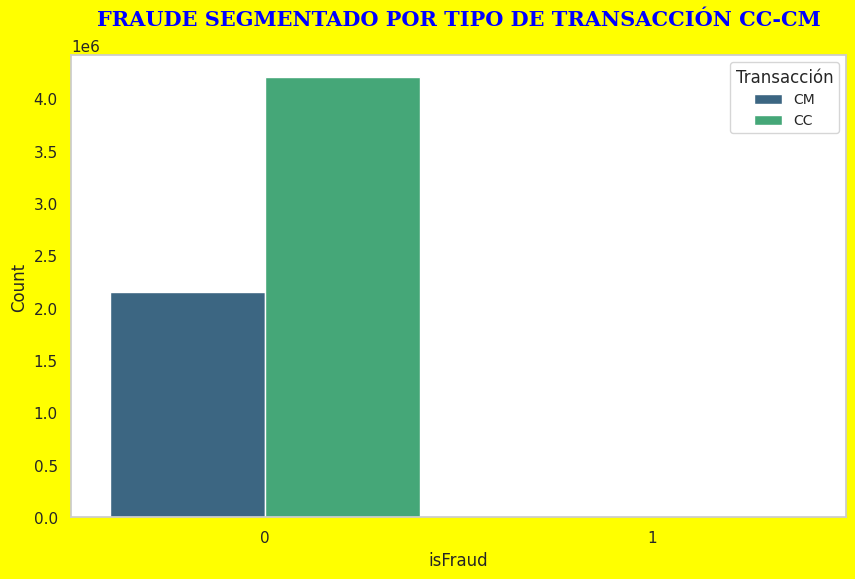

In [60]:
# Crear un gráfico de barras segmentado por tipo de transacción y fraude
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', hue='type_2', data=df_banco, palette='viridis')
plt.xlabel('isFraud', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('FRAUDE SEGMENTADO POR TIPO DE TRANSACCIÓN CC-CM', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                            'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Transacción', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

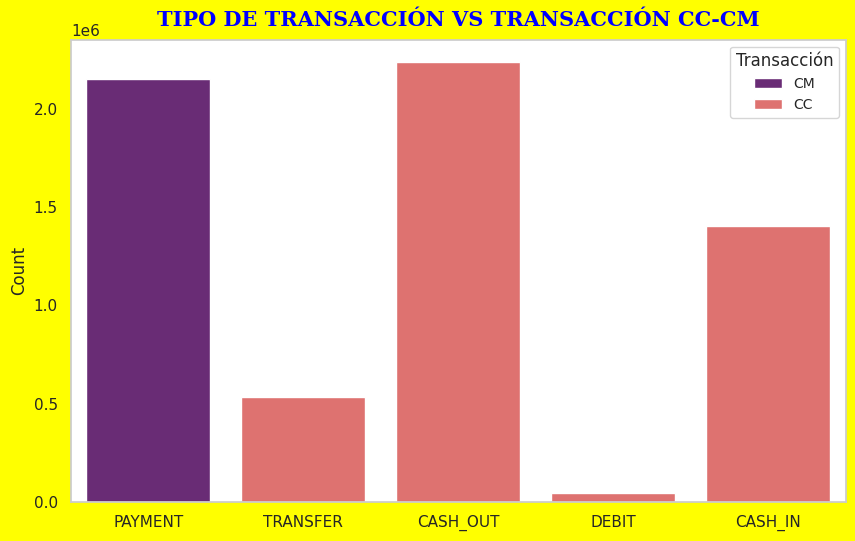

In [61]:
# Crear un gráfico de barras segmentado por tipo de transacción 1 y 2
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='type_2', data=df_banco, palette='magma')
plt.xlabel('', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('TIPO DE TRANSACCIÓN VS TRANSACCIÓN CC-CM', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                            'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Transacción', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Los tipos de transacción CM, casi en su totalidad son para el método de transacción PAYMENT.
* CASH_OUT posee la mayor cantidad de transacciones CC.

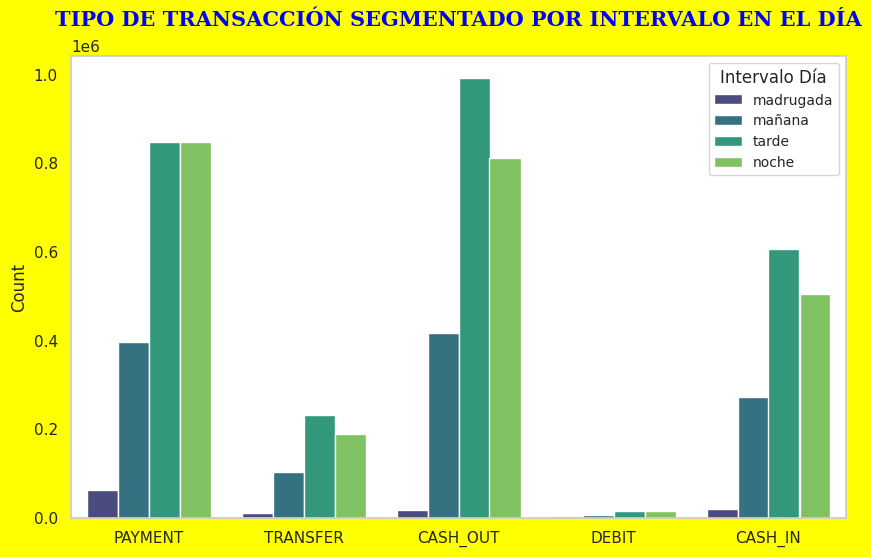

In [62]:
# Crear un gráfico de barras tipo de transacción segmentado por intervalo en el día
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='part_of_the_day', data=df_banco, palette='viridis')
plt.xlabel('', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('TIPO DE TRANSACCIÓN SEGMENTADO POR INTERVALO EN EL DÍA', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                            'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Intervalo Día', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Como ya habiamos notado anteriormente, casi todas las transacciones se realizan en la TARDE y NOCHE.
* Por otro lado, notamos que el método de transacción PAYMENT, es el que tiene mayor interacción por los clientes en la madrugada.

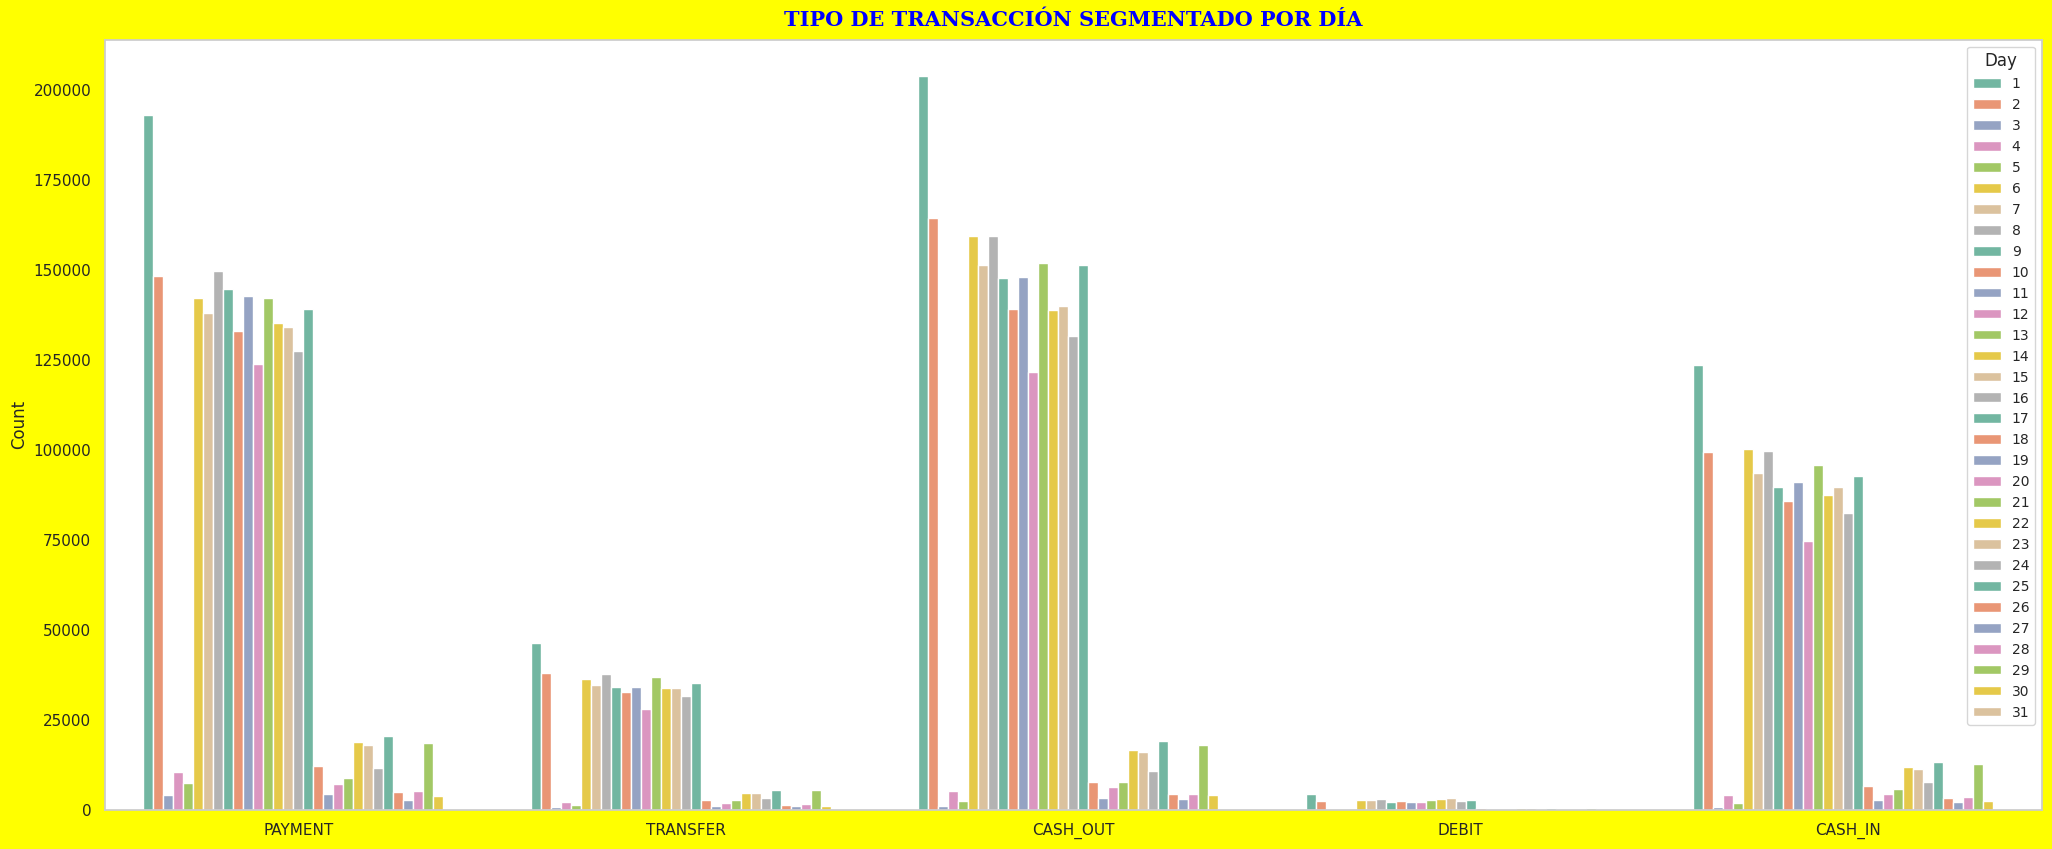

In [63]:
# Crear un gráfico de barras tipo de transacción segmentado por día
plt.figure(figsize=(25, 10))
sns.countplot(x='type', hue='day', data=df_banco, palette='Set2')
plt.xlabel('', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('TIPO DE TRANSACCIÓN SEGMENTADO POR DÍA', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Day', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Los primeros dos días fueron donde se realizaron las mayores transacciones, en cantidad por día.
* El intervalo del día 6 al día 17, fueron donde se realizaron bastantes transacciones y constantes.
* Como ya lo habiamos notado en otros análisis, con el método DEBIT, se realizaron muy pocas transacciones comparados con los demás.
* PAYMENT y CASHOUT, son los métodos que comprenden la mayor cantidad de transacciones de todos.

## 3.3 Análisis Multivariado

In [64]:
df_banco.head(20)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_2,day,part_of_the_day
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64,str,i64,str
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0,"""CC""",1,"""madrugada"""
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0,"""CC""",1,"""madrugada"""
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7817.71,"""C90045638""",53860.0,46042.29,"""M573487274""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7107.77,"""C154988899""",183195.0,176087.23,"""M408069119""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",7861.64,"""C1912850431""",176087.23,168225.59,"""M633326333""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""
1,"""PAYMENT""",4024.36,"""C1265012928""",2671.0,0.0,"""M1176932104""",0.0,0.0,0,0,"""CM""",1,"""madrugada"""


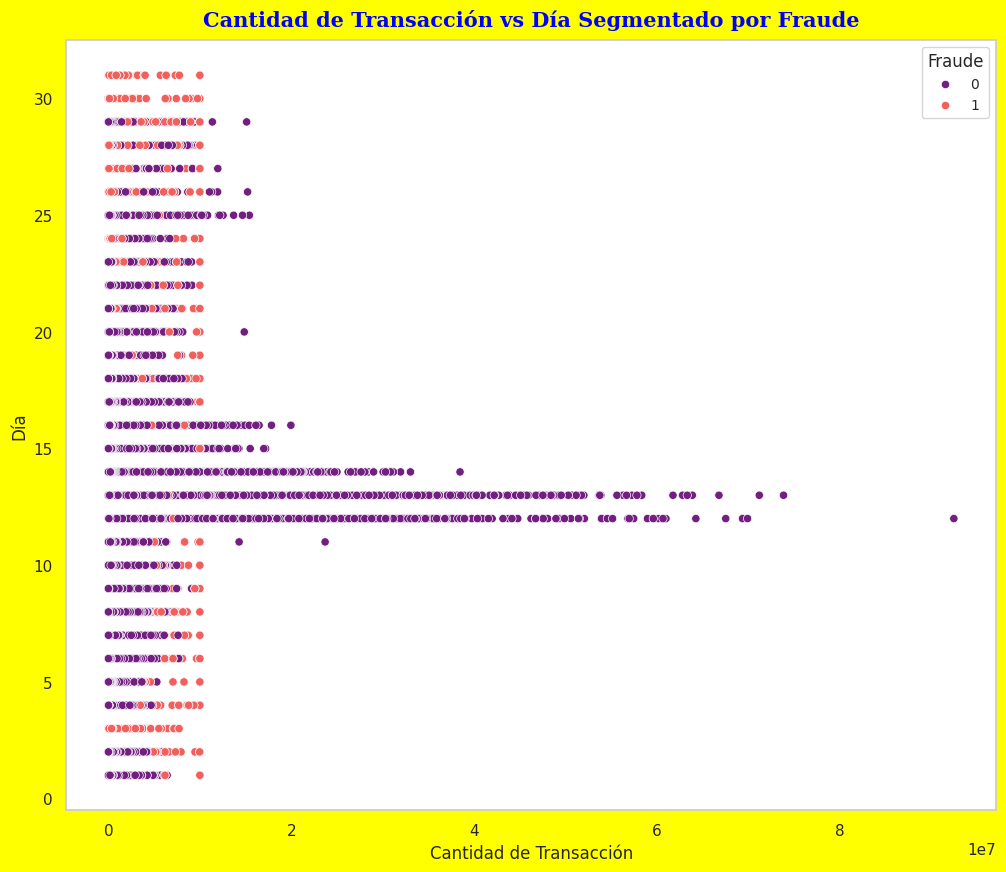

In [65]:
## Gráfico scatter Cantidad de Transacción vs Día Segmentado por Fraude
plt.figure(figsize=(12, 10))
sns.scatterplot(x='amount', y='day', hue='isFraud', data=df_banco, palette='magma')
plt.xlabel('Cantidad de Transacción', fontsize=12)
plt.ylabel('Día', fontsize=12)
plt.title('Cantidad de Transacción vs Día Segmentado por Fraude', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Fraude', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Observamos que normalmente se dieron los fraudes los primeros días del mes y los últimos días del mes, esto se podría comprender porque muchas personas reciben sus sueldos por esos días.
* Notamos que los montos más elevados de fraude, están por los valores de 1000000
* Para montos muy elevados, notamos que no se registranos fraude. Se analizará a detalle posteriormente

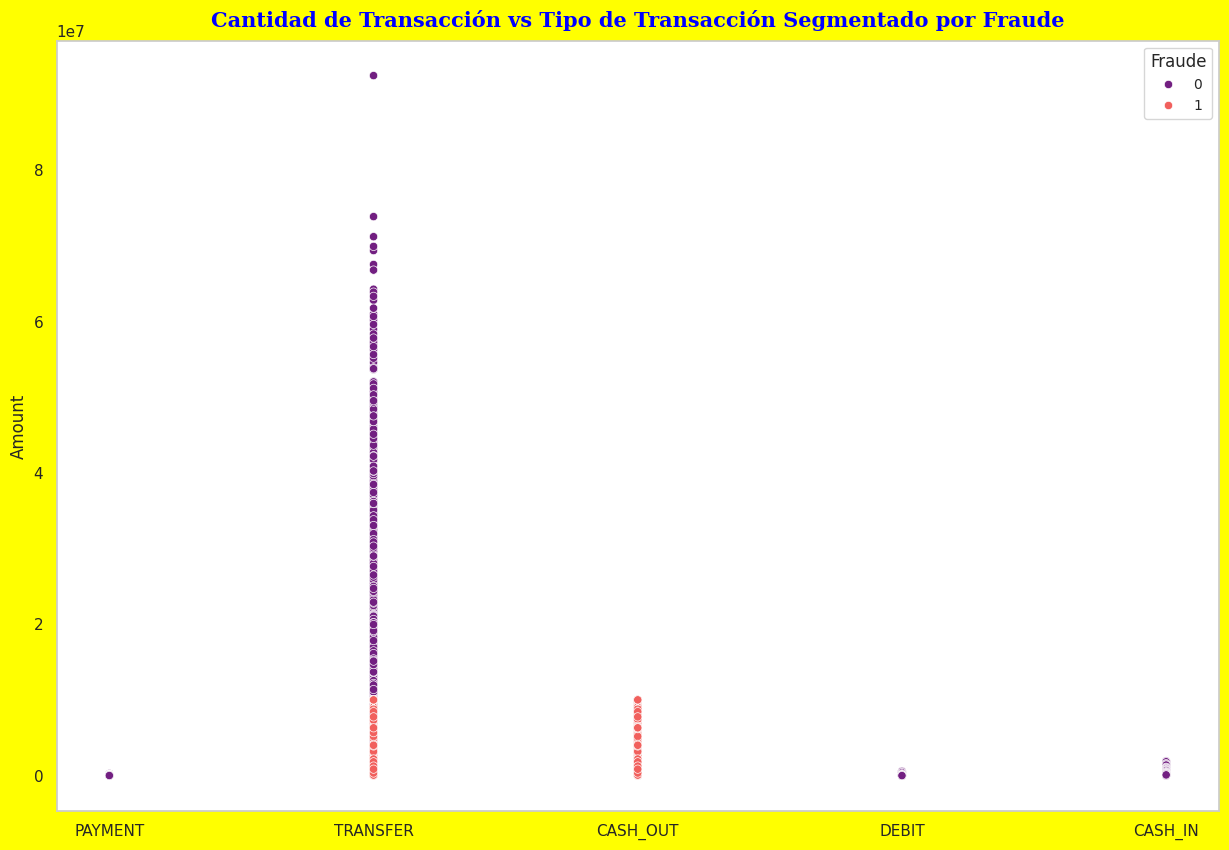

In [66]:
## Gráfico scatter Cantidad de Transacción vs Tipo de Transacción Segmentado por Fraude
plt.figure(figsize=(15, 10))
sns.scatterplot(x='type', y='amount', hue='isFraud', data=df_banco, palette='magma')
plt.xlabel('', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Cantidad de Transacción vs Tipo de Transacción Segmentado por Fraude', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Fraude', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Se visualiza gran presencia de Fraude en los métodos de transacción CASH_OUT y TRANSFER.
* Si bien PAYMENT y CASHOUT, son los métodos más utilizados, notamos que estos se dan para montos no tan elevados. Por el contrario el método TRANSFER, si bien no es el más utilizado, si registra transacciones de montos muy elevados, es el que tiene el mayor monto de transacción registrado.

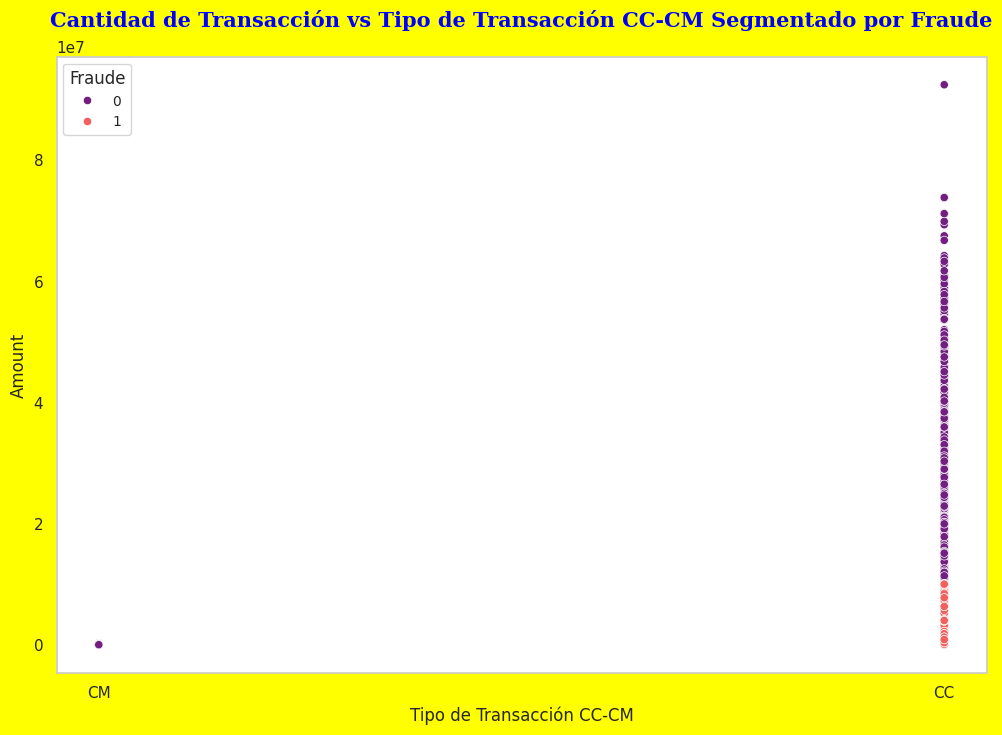

In [67]:
## Gráfico scatter Cantidad de Transacción vs Tipo de Transacción CC-CM Segmentado por Fraude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='type_2', y='amount', hue='isFraud', data=df_banco, palette='magma')
plt.xlabel('Tipo de Transacción CC-CM', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Cantidad de Transacción vs Tipo de Transacción CC-CM Segmentado por Fraude', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Fraude', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Validamos que el fraude se ha dado en Tipo de transacción CC, por lo general solo para montos relativamente bajos, no tan elevados.
* El tipo de transacción CM, no se visualiza presencia de Fraude.
* No se visualiza Fraude en montos muy elevados.

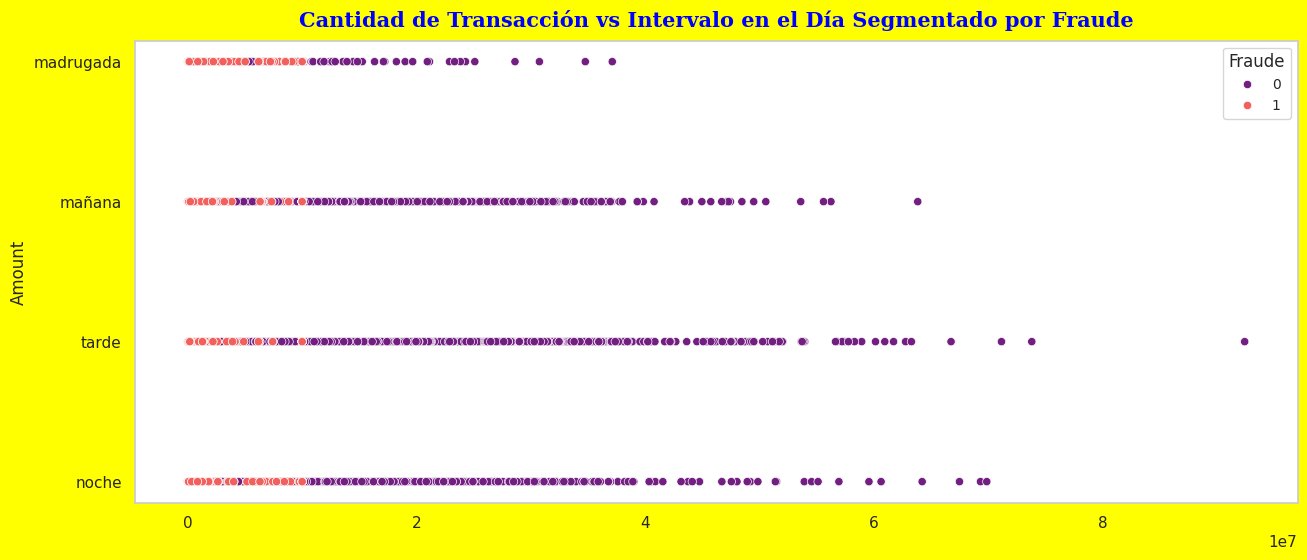

In [68]:
## Gráfico scatter Cantidad de Transacción vs Tipo de Transacción Segmentado por Fraude
plt.figure(figsize=(15, 6))
sns.scatterplot(x='amount', y='part_of_the_day', hue='isFraud', data=df_banco, palette='magma')
plt.xlabel('', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Cantidad de Transacción vs Intervalo en el Día Segmentado por Fraude', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Fraude', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Observamos que transacciones Fraudulentas se han dado en todos los intervalos del día.
* Se visualiza, ligera predominancia de fraude de noche y de madrugada.
* El monto más grande de transacción se dío en la tarde.

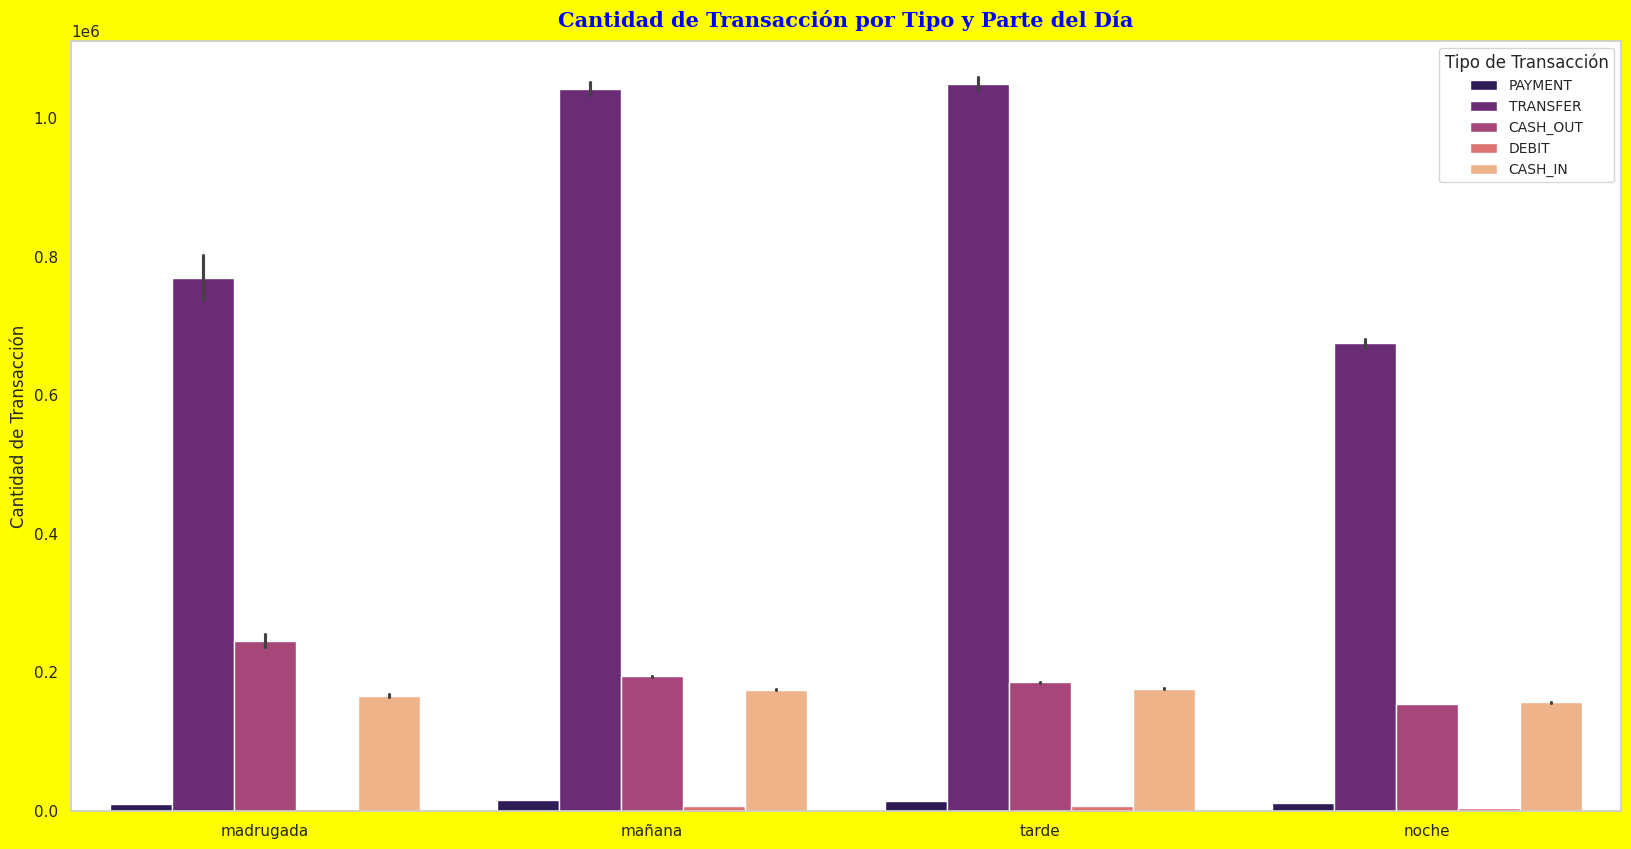

In [69]:
# Crear un gráfico de barras para la cantidad de transacción por tipo y parte del día
plt.figure(figsize=(20, 10))
sns.barplot(data=df_banco, x='part_of_the_day', y='amount', hue='type', palette='magma', dodge=True)

# Establecer etiquetas y título del gráfico
plt.xlabel('', fontsize=12)
plt.ylabel('Cantidad de Transacción', fontsize=12)
plt.title('Cantidad de Transacción por Tipo y Parte del Día', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Tipo de Transacción', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Nos damos cuenta que los tipos de Transacción que más montos efectúan son el tipo TRANSFER (por gran diferencia del resto), CASH_OUT y CASH_IN.
* El método PAYMENT y DEBIT, son los que menores montos registran.
* Los mayores montos con el método TRANSFER, se realizaron en la maana y en el tarde.
* Por el contrario, con el método CASHOUT, se realizaron los mayores montos en la madrugada.

## 3.3.1 <ins>Analizando solo los datos de FRAUDE</ins>

In [92]:
## Montos en FRAUDE
# df_banco_amount_fraud = df_banco[df_banco['isFraud']==1][['amount','part_of_the_day', 'type', 'day','type_2']].sort_values(by='amount', ascending=False)
# df_banco_amount_fraud
df_banco_amount_fraud = df_banco.filter(pl.col('isFraud') == 1).select(['amount','part_of_the_day', 'type', 'day','type_2']).to_pandas().sort_values(by='amount', ascending=False)
df_banco_amount_fraud.head(288)

,amount,part_of_the_day,type,day,type_2
8122,10000000.00,tarde,CASH_OUT,31,CC
28,10000000.00,madrugada,TRANSFER,1,CC
29,10000000.00,madrugada,CASH_OUT,1,CC
8172,10000000.00,noche,CASH_OUT,31,CC
8171,10000000.00,noche,TRANSFER,31,CC
...,...,...,...,...,...
2676,10000000.00,noche,CASH_OUT,10,CC
2677,10000000.00,noche,TRANSFER,10,CC
2678,10000000.00,noche,CASH_OUT,10,CC
2675,10000000.00,noche,TRANSFER,10,CC


* Observamos que los mayores monto registrados de transacciones Fraudulentas son de 10000000, un total de 287 transacciones, y se registraron en los horarios de la tarde/noche/madrugada, y todos son del tipo transacción CC, y los métodos de pago son CASH_OUT y TRANSFER.

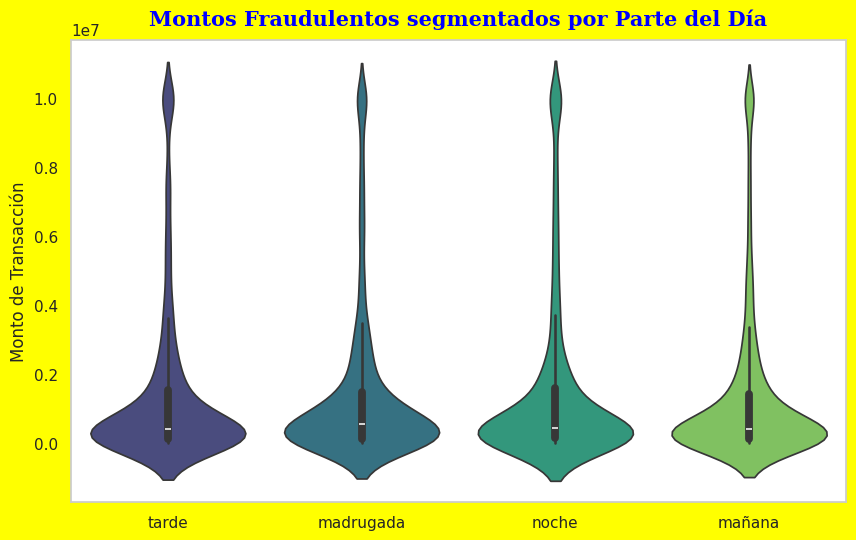

In [93]:
# Crear un gráfico de violín para visualizar la distribución del TOP20 de montos de transacción Fraudulentos por parte del día
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_banco_amount_fraud, x='part_of_the_day', y='amount', palette='viridis')
plt.xlabel('', fontsize=12)
plt.ylabel('Monto de Transacción', fontsize=12)
plt.title('Montos Fraudulentos segmentados por Parte del Día', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Notamos que los fraudes suelen realizarse en varias horas del día, pero un poco más en la noche/tarde/madrugada y los montos suelen oscilar entre 0 y 0.4*10^7. Pero vemos que hay unos montos que son muy elevados del rango de 10^7.


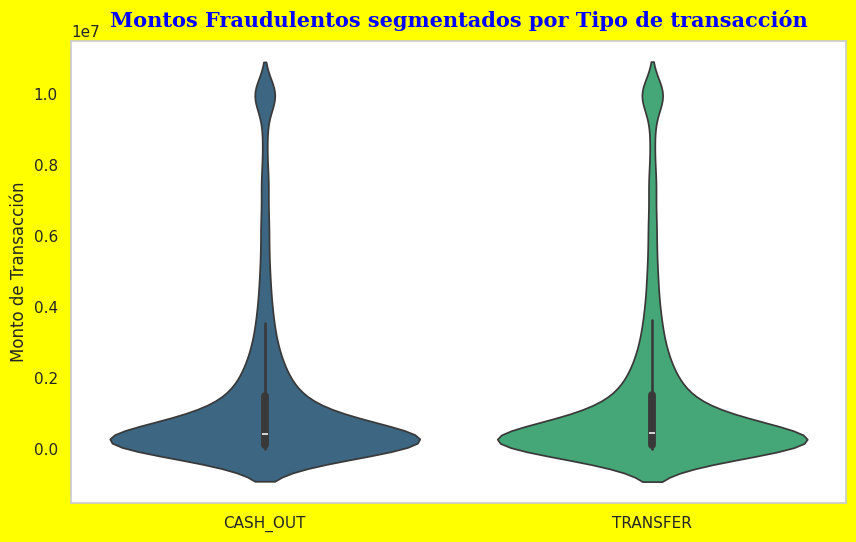

In [95]:
# Crear un gráfico de violín para visualizar la distribución de montos de transacción Fraudulentos por parte del día
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_banco_amount_fraud, x='type', y='amount', palette='viridis')
plt.xlabel('', fontsize=12)
plt.ylabel('Monto de Transacción', fontsize=12)
plt.title('Montos Fraudulentos segmentados por Tipo de transacción', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Observamos que los tipos de transacción que son fraudulentos, son el CASH_OUT y TRANSFER. Pero nos damos cuenta que tiene una tendencia muy parecida, eso quiere decir que se realiza el mismo tipo de fraude con estos dos métodos.

In [106]:
## Agrupando por tipo de Transacción y parte del día
# df_groupby_type_fraude = df_banco_amount_fraud.groupby(['type','part_of_the_day']).sum().drop(columns=['day','type_2']).reset_index()
# df_groupby_type_fraude
df_groupby_type_fraude = df_banco_amount_fraud.groupby(['type','part_of_the_day']).sum().drop(columns=['day','type_2'])
df_groupby_type_fraude

amount
type     part_of_the_day              
CASH_OUT madrugada        1.470094e+09
         mañana           1.418263e+09
         noche            1.569504e+09
         tarde            1.531342e+09
TRANSFER madrugada        1.478014e+09
         mañana           1.443881e+09
         noche            1.594283e+09
         tarde            1.551035e+09

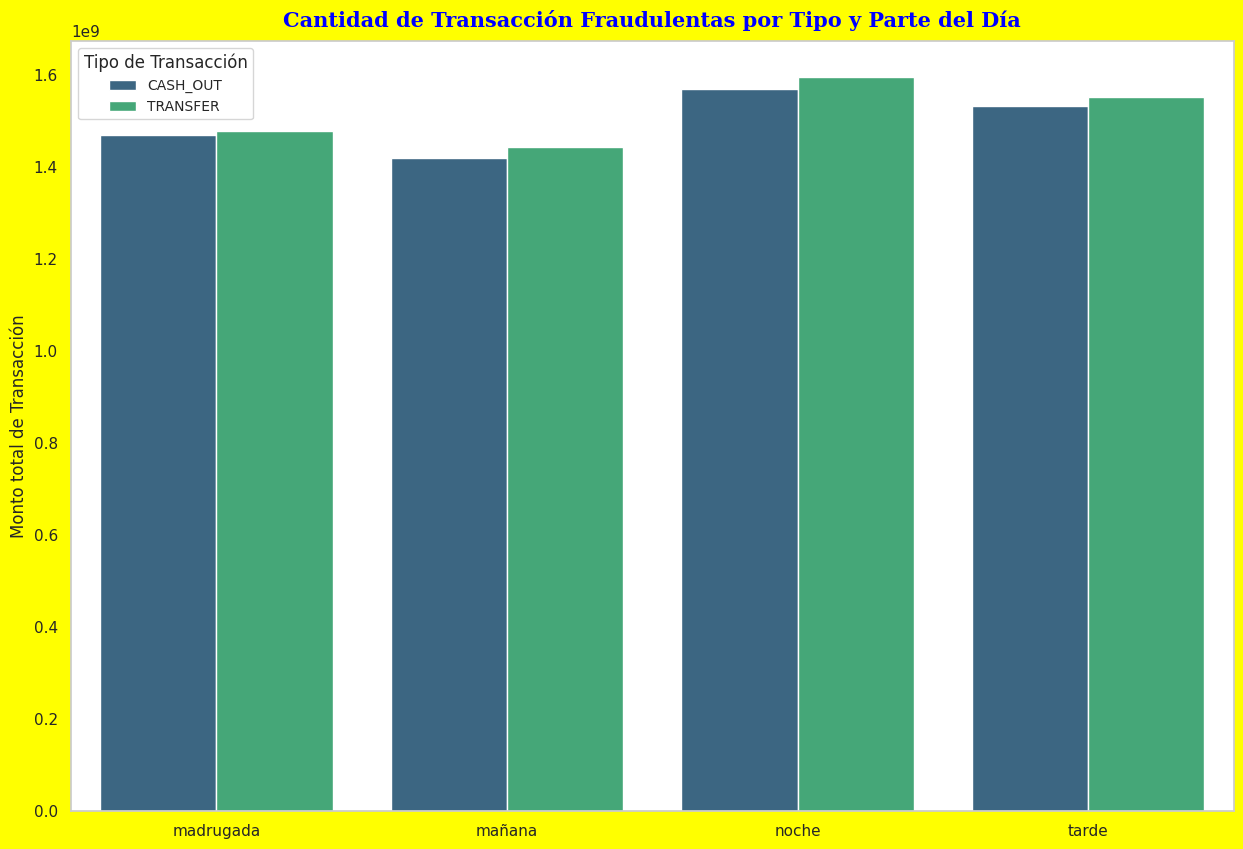

In [112]:
# Creamos un gráfico de barras agrupado para la cantidad de transacción por tipo y parte del día
plt.figure(figsize=(15, 10))
sns.barplot(data=df_groupby_type_fraude, x='part_of_the_day', y='amount', hue='type', palette='viridis', dodge=True)

# Establecer etiquetas y título del gráfico
plt.xlabel('', fontsize=12)
plt.ylabel('Monto total de Transacción', fontsize=12)
plt.title('Cantidad de Transacción Fraudulentas por Tipo y Parte del Día', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(title='Tipo de Transacción', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

* Las sumás más grandes registradas de Fraudes en total se dieron en el horario de la noche, seguido de la tarde.

In [111]:
df_groupby_type_fraude_count = df_banco_amount_fraud.groupby(['type','part_of_the_day']).count().drop(columns=['day','type_2'])
df_groupby_type_fraude_count

amount
type     part_of_the_day        
CASH_OUT madrugada           999
         mañana             1047
         noche              1025
         tarde              1045
TRANSFER madrugada           997
         mañana             1047
         noche              1021
         tarde              1032

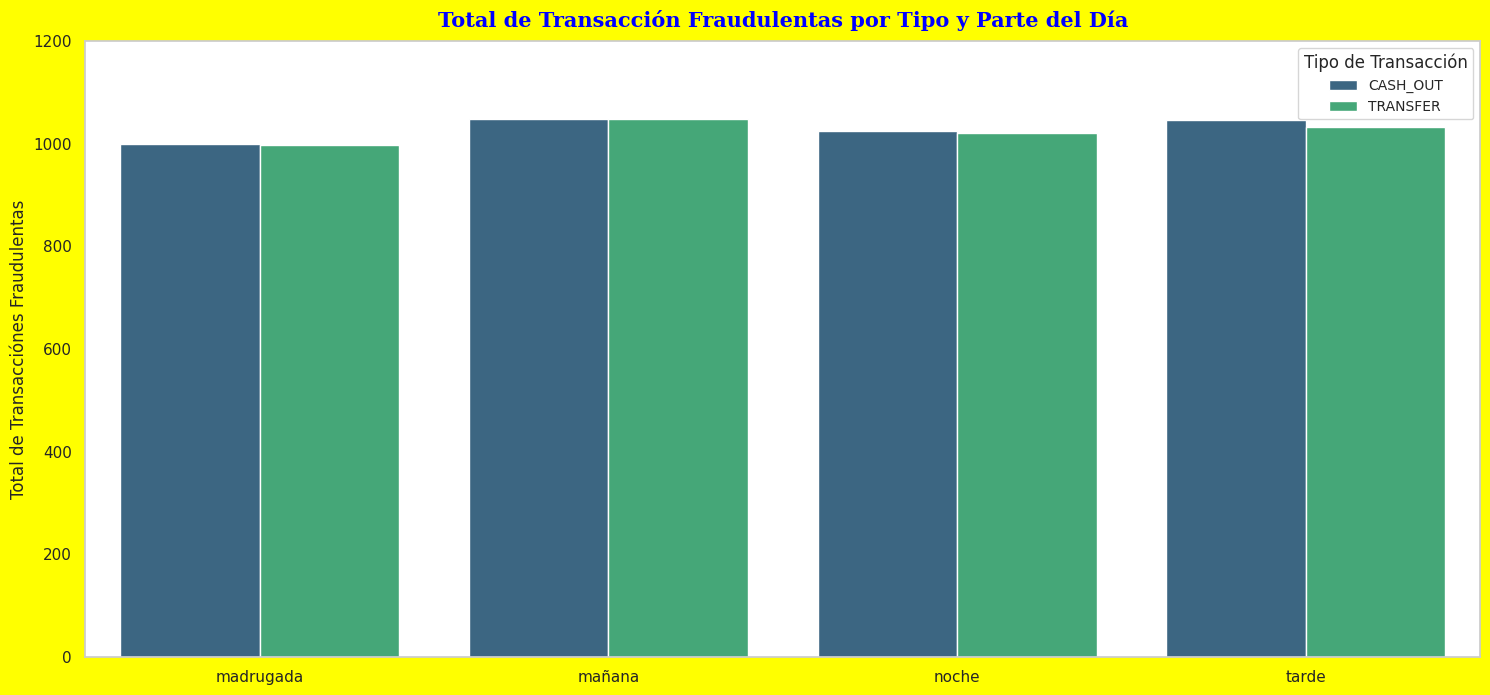

In [116]:
# Creamos un gráfico de barras agrupado para la cantidad de transacción por tipo y parte del día
plt.figure(figsize=(18, 8))
sns.barplot(data=df_groupby_type_fraude_count, x='part_of_the_day', y='amount', hue='type', palette='viridis', dodge=True)

# Establecer etiquetas y título del gráfico
plt.xlabel('', fontsize=12)
plt.ylabel('Total de Transacciónes Fraudulentas', fontsize=12)
plt.title('Total de Transacción Fraudulentas por Tipo y Parte del Día', fontsize=15, pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif',
                                                                                                    'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer los límites del eje y
plt.ylim(0, 1200)
plt.legend(title='Tipo de Transacción', fontsize=10)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.show()

In [119]:
## Consiguiendo solo los valores más altos Fraudulentos
df_banco_amount_fraud[df_banco_amount_fraud['amount'] == df_banco_amount_fraud['amount'].max()]

,amount,part_of_the_day,type,day,type_2
8122,10000000.0,tarde,CASH_OUT,31,CC
28,10000000.0,madrugada,TRANSFER,1,CC
29,10000000.0,madrugada,CASH_OUT,1,CC
8172,10000000.0,noche,CASH_OUT,31,CC
8171,10000000.0,noche,TRANSFER,31,CC
...,...,...,...,...,...
2587,10000000.0,tarde,CASH_OUT,10,CC
2676,10000000.0,noche,CASH_OUT,10,CC
2677,10000000.0,noche,TRANSFER,10,CC
2678,10000000.0,noche,CASH_OUT,10,CC


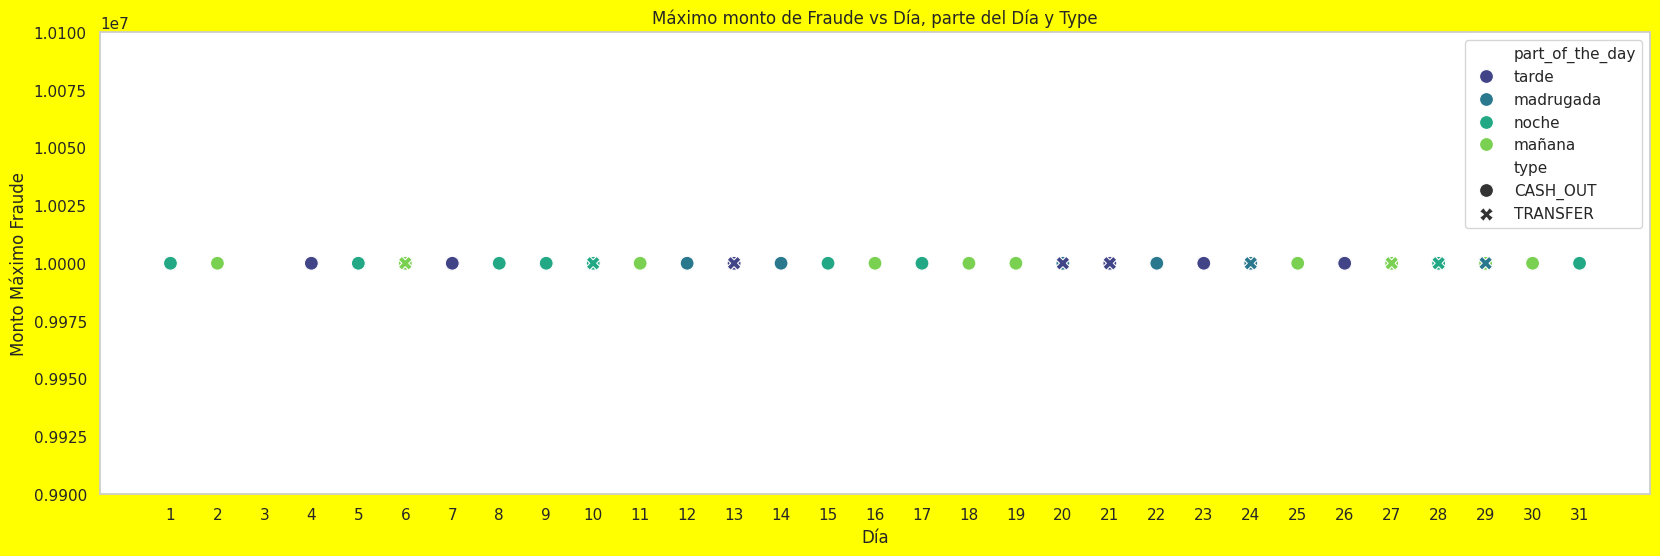

In [134]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 6))

# Crear un gráfico de puntos para mostrar los montos por 'part_of_the_day', 'day' y 'type'
sns.scatterplot(data=df_banco_amount_fraud[df_banco_amount_fraud['amount'] == df_banco_amount_fraud['amount'].max()], x='day', y='amount',
                hue='part_of_the_day', style='type', s=100, palette='viridis')

# Establecer los límites del eje y (puedes ajustar según sea necesario)
plt.ylim(df_banco_amount_fraud['amount'].max()-100000, df_banco_amount_fraud['amount'].max()+100000)

# Añadir etiquetas y título
plt.xlabel('Día')
plt.ylabel('Monto Máximo Fraude')
plt.title('Máximo monto de Fraude vs Día, parte del Día y Type')

# Mostrar la leyenda
plt.legend(loc='upper right')
plt.gcf().set_facecolor('yellow')
plt.grid(False)
# Establecer todas las etiquetas del eje x
plt.xticks(range(1, 32))

# Mostrar el gráfico
plt.show()

## 3.4 Análisis HEATMAP de Correlación

In [171]:
df_banco_new.corr().to_pandas().set_index(df_banco_new.corr().to_pandas().columns)

,step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount,isFraud,type_2_CC,type_2_CM,day,part_of_the_day_madrugada,part_of_the_day_mañana,part_of_the_day_noche,part_of_the_day_tarde
step,1.000000,0.004028,-0.012917,0.002864,0.005497,0.006042,0.019189,0.030648,-0.005497,0.005497,0.999539,0.001520,-0.061140,0.063732,-0.014415
type_CASH_IN,0.004028,1.000000,-0.391888,-0.043065,-0.379401,-0.160358,-0.005992,-0.018932,0.379401,-0.379401,0.004264,-0.015701,0.008428,-0.013041,0.010288
type_CASH_OUT,-0.012917,-0.391888,1.000000,-0.059748,-0.526383,-0.222481,0.000813,0.011096,0.526383,-0.526383,-0.013006,-0.053500,-0.003402,-0.014386,0.031053
type_DEBIT,0.002864,-0.043065,-0.059748,1.000000,-0.057844,-0.024449,-0.024385,-0.002886,0.057844,-0.057844,0.003165,0.038718,-0.004223,0.002078,-0.009034
type_PAYMENT,0.005497,-0.379401,-0.526383,-0.057844,1.000000,-0.215392,-0.205225,-0.025429,-1.000000,1.000000,0.005175,0.060126,-0.005903,0.031346,-0.042057
type_TRANSFER,0.006042,-0.160358,-0.222481,-0.024449,-0.215392,1.000000,0.365597,0.053528,0.215392,-0.215392,0.006305,0.001852,0.004571,-0.009814,0.005493
amount,0.019189,-0.005992,0.000813,-0.024385,-0.205225,0.365597,1.000000,0.071017,0.205225,-0.205225,0.020217,-0.008734,0.022826,-0.042522,0.025886
isFraud,0.030648,-0.018932,0.011096,-0.002886,-0.025429,0.053528,0.071017,1.000000,0.025429,-0.025429,0.031642,0.061179,0.006131,-0.009007,-0.012374
type_2_CC,-0.005497,0.379401,0.526383,0.057844,-1.000000,0.215392,0.205225,0.025429,1.000000,-1.000000,-0.005175,-0.060126,0.005903,-0.031346,0.042057
type_2_CM,0.005497,-0.379401,-0.526383,-0.057844,1.000000,-0.215392,-0.205225,-0.025429,-1.000000,1.000000,0.005175,0.060126,-0.005903,0.031346,-0.042057


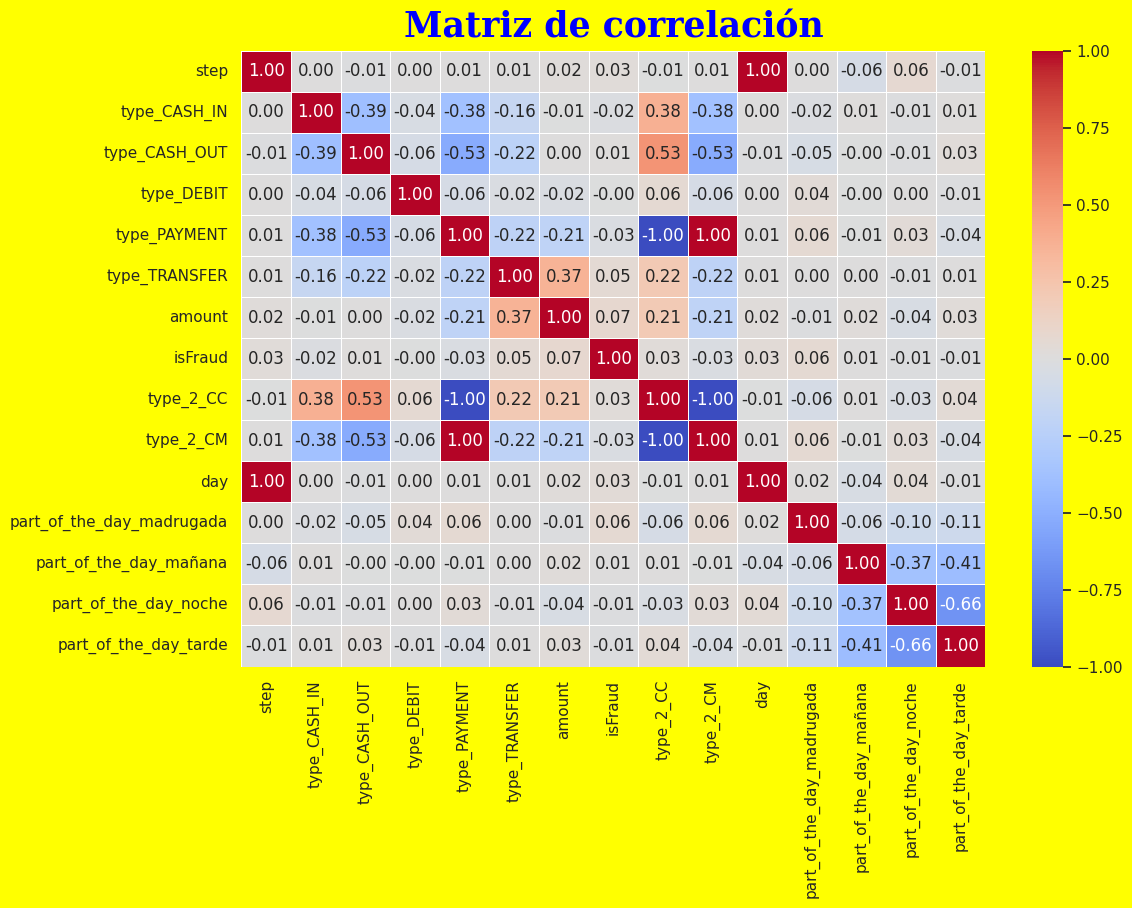

In [172]:
# Correlación entre variables
correlation_matrix = df_banco_new.corr().to_pandas().set_index(df_banco_new.corr().to_pandas().columns)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación', pad=10, fontdict={'fontsize': 25, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Nuestra variable objetivo **'isFraud'**, tiene baja correlación con las demás variables, lo ideal sería tener una alta correlación con las otras variables.
* Debido a que nosotros queremos conseguir si es fraudulenta una operación y despues de realizar el análisis de datos, llegamos a la conclusión de que las variables TRANSFER y CASHOUT, son de suma importancia, ya que en estas variables es donde se consiguió el fraude. Por el contrario, si bien las variables CASH_IN y PAYMENT tienen correlación relativamente considerable con otras variables importantes como CC y CM, decidimos mantenerlas, debido a que estas variables tienen bastantes transacciones pero con montos muy bajos, asi, que esto puede afectar en lso análisis si lo eliminamos. Por último, la variable DEBIT no tiene alta correlación con otras variables, pero tampoco tiene correlación con la variable objetivo, asi que no es tan relevante, y ahunado a esto no registra muchas transacciones, decidimos eliminarla.
* En este caso, MAÑANA, TARDE y NOCHE se correlacionan, sin embargo, luego de realizar nuestro análisis de datos, nos damos cuenta que en todos estos intervalos se presenta fraude, asi que necesitamos tener estas variables para los análisis. Por otro lado la variable MADRUGADA, si bien tiene baja correlación con la variable ojetivo, también tiene presencia de FRAUDE en este horario, asi que lo mantendremos.
* La variable STEP se correlaciona mucho con la variable DAY, y como hemos utilizado esa variable para generar nuevas variables, decidimos en este caso prescindir de esta variable.
* La variable DAY, si bien no se correlaciona con la variable objetivo, consideramos una variable importante para el análisis del Fraude, ya que en diferentes días se presentan los casos.
* Por otro lado vemos que las variables CC, CM, PAYMENT, CASH_OUT, CASH_IN y AMOUNT, se correlacionan, de alta forma, sin embargo, consideramos que estas variables son importantes para el análisis, ya que nos dan mucha referencia al momento de analizar si una transacción es o no es fraudulenta.

In [173]:
list(df_banco_new.columns)

['step',
 'type_CASH_IN',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER',
 'amount',
 'isFraud',
 'type_2_CC',
 'type_2_CM',
 'day',
 'part_of_the_day_madrugada',
 'part_of_the_day_mañana',
 'part_of_the_day_noche',
 'part_of_the_day_tarde']

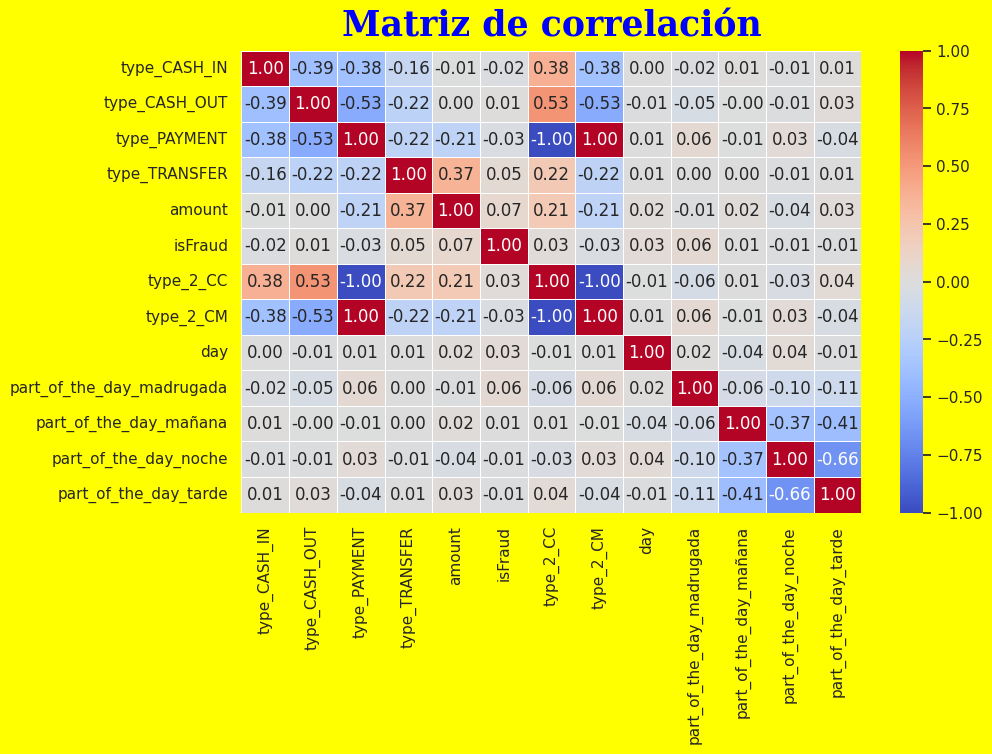

In [174]:
variables_a_eliminar = ['type_DEBIT', 'step']
df_banco_clean = df_banco_new.drop(variables_a_eliminar)

correlation_matrix = df_banco_clean.corr().to_pandas().set_index(df_banco_clean.corr().to_pandas().columns)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación', pad=10, fontdict={'fontsize': 25, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Notamos que sigue existiendo cierta correlación entre algunas variables. Sin embargo, consideramos que estas variables son importantes para nuestro futuro análisis, es asi que decidimos continuar con estas variables.

## 3.5 Balanceo de datos: Variable objetivo 'isFraud'

In [195]:
## Verificando la cantidad de datos para cada clase
df_banco_balanced = df_banco_clean.clone()
df_banco_balanced.groupby('isFraud').count().to_pandas()

,isFraud,count
0,0,6342471
1,1,8048


In [196]:
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [197]:
# Creamos DataFrames separados por clase
df_majority = df_banco_balanced.filter(pl.col('isFraud') == 0)
df_minority = df_banco_balanced.filter(pl.col('isFraud') == 1)

In [198]:
# Undersample la clase mayoritaria
df_majority_undersampled = resample(df_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=3000000,  # reducir a 300000
                                    random_state=42)

In [199]:
# Combinar la clase minoritaria con la clase mayoritaria undersampled
df_combined = pl.concat([df_majority_undersampled, df_minority])

In [200]:
# Separar características y variable objetivo
X_combined = df_combined.drop('isFraud').to_pandas()
y_combined = df_combined.select('isFraud').to_pandas()

In [201]:
# Oversample la clase minoritaria usando RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_combined, y_combined)

In [202]:
# Combinar los datos resampleados en un solo DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Verificar el balance de clases
print(df_resampled['isFraud'].value_counts())

isFraud
0    3000000
1    3000000
Name: count, dtype: int64


In [203]:
df_resampled

,type_CASH_IN,type_CASH_OUT,type_PAYMENT,type_TRANSFER,amount,type_2_CC,type_2_CM,day,part_of_the_day_madrugada,part_of_the_day_mañana,part_of_the_day_noche,part_of_the_day_tarde,isFraud
0,0,1,0,0,270304.01,1,0,6,0,0,0,1,0
1,0,0,1,0,2201.10,0,1,12,0,0,0,1,0
2,0,0,1,0,18972.90,0,1,10,0,0,0,1,0
3,0,1,0,0,193616.95,1,0,17,0,0,1,0,0
4,1,0,0,0,53254.37,1,0,11,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,0,0,0,1,376367.26,1,0,13,0,0,1,0,1
5999996,0,1,0,0,3608191.52,1,0,8,0,0,0,1,1
5999997,0,0,0,1,59749.28,1,0,18,0,0,1,0,1
5999998,0,1,0,0,314251.58,1,0,1,0,0,1,0,1


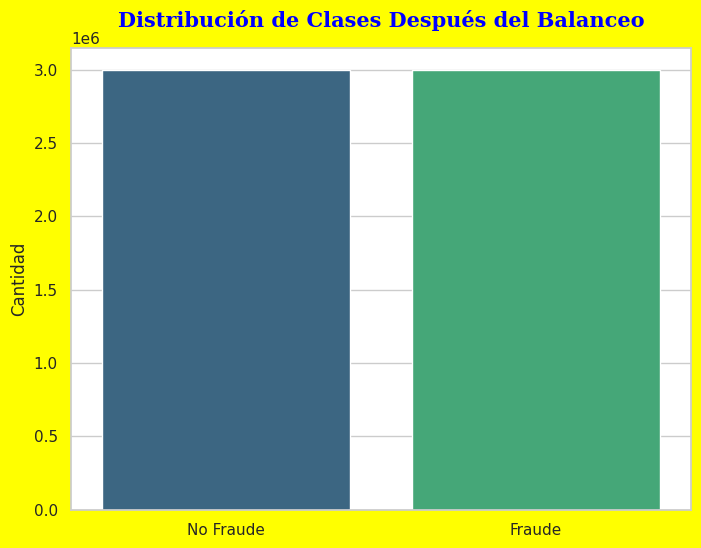

In [204]:
# Creamos el gráfico de barras después del balanceo
plt.figure(figsize=(8, 6))
sns.barplot(x=df_resampled['isFraud'].value_counts().index, y=df_resampled['isFraud'].value_counts().values, palette='viridis')
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('')
plt.title('Distribución de Clases Después del Balanceo', pad=15, fontdict={'fontsize': 15, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

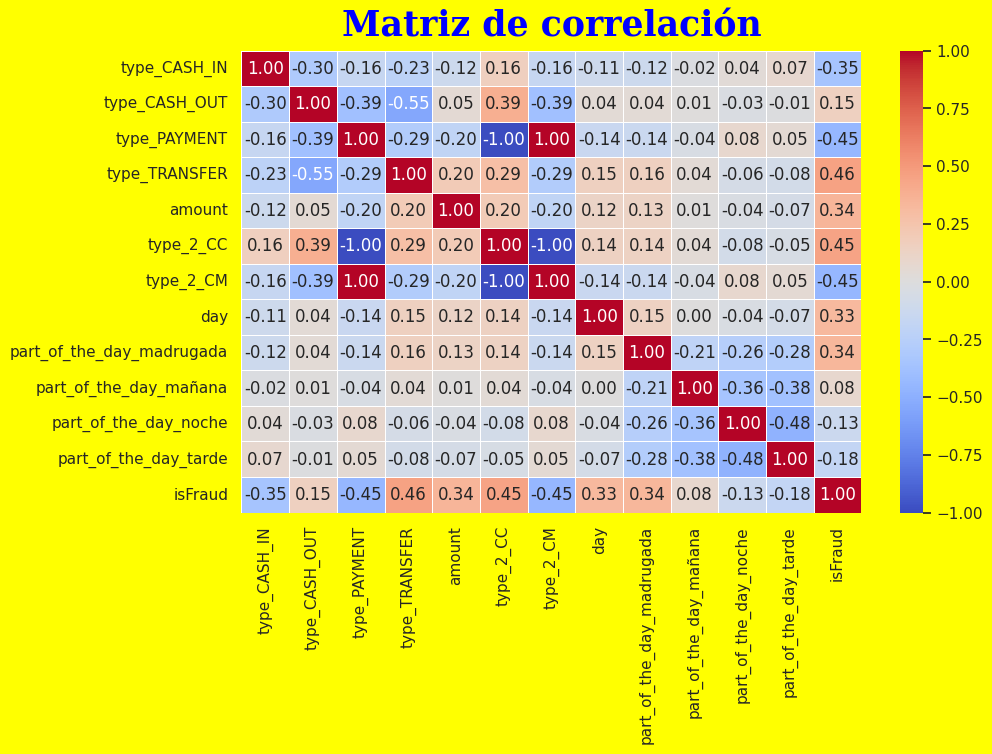

In [205]:
## Matriz de correlación después del balanceo de la variable objetivo
correlation_matrix = df_resampled.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación', pad=10, fontdict={'fontsize': 25, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Observamos que algunas variables mejoraron en correlación con la variable objetivo, después de realizar el balanceo de datos.

# 4. CONSTRUCCIÓN DE MODELOS

In [206]:
## Separando nuestros datos en prueba y entrenamiento
y = df_resampled['isFraud']
x = df_resampled.drop(columns='isFraud')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 77)

In [207]:
x_train.head()

,type_CASH_IN,type_CASH_OUT,type_PAYMENT,type_TRANSFER,amount,type_2_CC,type_2_CM,day,part_of_the_day_madrugada,part_of_the_day_mañana,part_of_the_day_noche,part_of_the_day_tarde
4482358,0,1,0,0,985127.95,1,0,25,0,1,0,0
4325990,0,1,0,0,40433.84,1,0,17,0,0,0,1
4725571,0,1,0,0,45116.24,1,0,24,1,0,0,0
1013662,0,0,1,0,34799.63,0,1,11,0,1,0,0
3496922,0,1,0,0,53782.87,1,0,6,0,0,1,0


In [208]:
y_train.head()

4482358    1
4325990    1
4725571    1
1013662    0
3496922    1
Name: isFraud, dtype: int64

In [209]:
## Validando las dimensiones de nuestros datos de entrenamiento a analizar
x_train.shape, y_train.shape

((4200000, 12), (4200000,))

In [210]:
## Validando las dimensiones de nuestros datos de prueba a analizar
x_test.shape, y_test.shape

((1800000, 12), (1800000,))

## <ins> Estandarizando los datos </ins>

In [211]:
## Estandarizando los datos de entrenamiento
standarscaler = StandardScaler()
standarscaler.fit(x_train)

StandardScaler()

In [212]:
## Datos de entrenamiento escalados
x_train_scaled = standarscaler.transform(x_train)
x_test_scaled = standarscaler.transform(x_test)

## 4.1 Regresión Logística

In [213]:
## Entrenando el modelo
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [214]:
y_pred = model.predict(x_test_scaled)

In [215]:
report = classification_report(y_test, y_pred, target_names=["No Fraude", "Fraude"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,No Fraude,Fraude,accuracy,macro avg,weighted avg
precision,0.870628,0.853435,0.861819,0.862032,0.862025
recall,0.849691,0.873929,0.861819,0.861810,0.861819
f1-score,0.860032,0.863561,0.861819,0.861796,0.861798
support,899325.000000,900675.000000,0.861819,1800000.000000,1800000.000000


In [216]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = model.predict_proba(x_test_scaled)[:,1]

In [217]:
## En este caso, sabemos que la clase 0 - No fraude y clase 1 - Fraude
## Calculamos las métricas para la clase 1
accuracy = accuracy_score(y_test, y_pred)
precision = report['Fraude']['precision']
recall = report['Fraude']['recall']
f1 = report['Fraude']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_lr = []
metricas_lr.extend([accuracy,precision,recall,f1,auc_roc])
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

Accuracy: 0.8618188888888889
Precision: 0.8534353677695942
Recall: 0.8739289976961723
F1-score: 0.8635606134577597
AUC-ROC: 0.9367925439612381


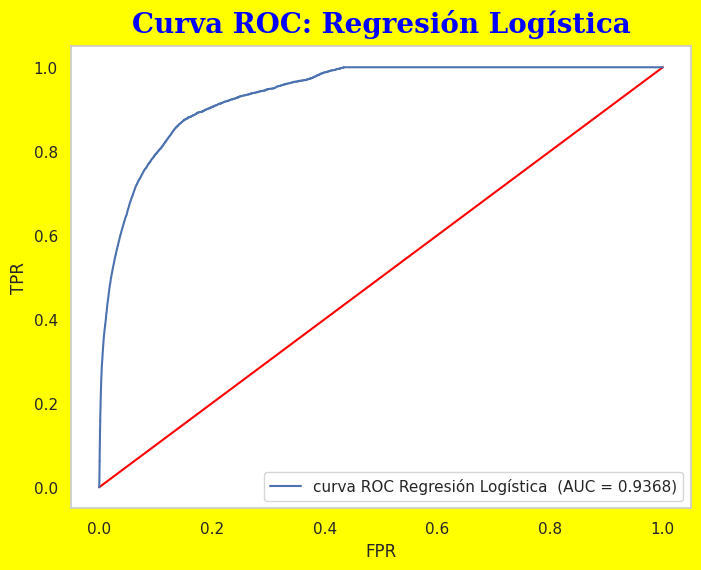

In [218]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Regresión Logística  (AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Regresión Logística',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

## 4.2 Árbol de Decisión

In [219]:
## Entrenando el modelo
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [220]:
y_pred = model.predict(x_test_scaled)

In [221]:
report = classification_report(y_test, y_pred, target_names=["No Fraude", "Fraude"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,No Fraude,Fraude,accuracy,macro avg,weighted avg
precision,1.000000,0.997916,0.998955,0.998958,0.998957
recall,0.997908,1.000000,0.998955,0.998954,0.998955
f1-score,0.998953,0.998957,0.998955,0.998955,0.998955
support,899325.000000,900675.000000,0.998955,1800000.000000,1800000.000000


In [222]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = model.predict_proba(x_test_scaled)[:,1]

In [223]:
## En este caso, sabemos que la clase 0 - No fraude y clase 1 - Fraude
## Calculamos las métricas para la clase 1
accuracy = accuracy_score(y_test, y_pred)
precision = report['Fraude']['precision']
recall = report['Fraude']['recall']
f1 = report['Fraude']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_dt = []
metricas_dt.extend([accuracy,precision,recall,f1,auc_roc])
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

Accuracy: 0.998955
Precision: 0.9979159187906346
Recall: 1.0
F1-score: 0.9989568724140169
AUC-ROC: 0.9989567754619516


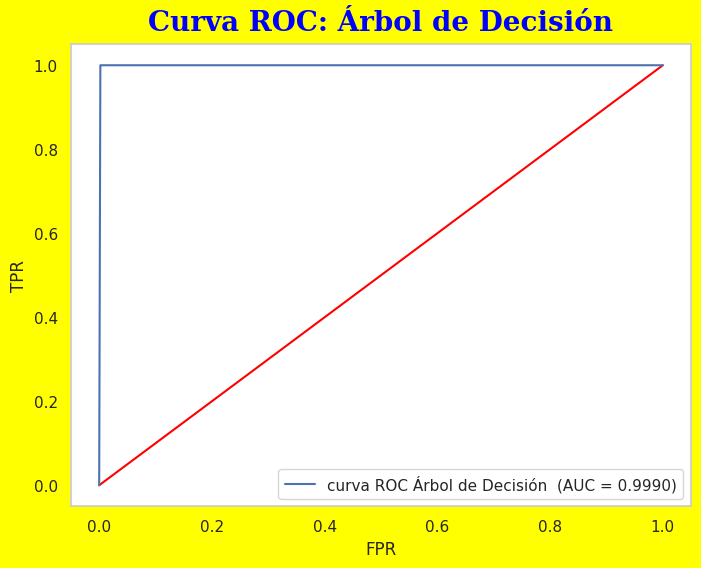

In [224]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Árbol de Decisión  (AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Árbol de Decisión',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

## 4.3 Random Forest

In [225]:
## Entrenando el modelo
model = RandomForestClassifier()
model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [226]:
y_pred = model.predict(x_test_scaled)

In [227]:
report = classification_report(y_test, y_pred, target_names=["No Fraude", "Fraude"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,No Fraude,Fraude,accuracy,macro avg,weighted avg
precision,1.000000,0.997755,0.998874,0.998877,0.998876
recall,0.997746,1.000000,0.998874,0.998873,0.998874
f1-score,0.998872,0.998876,0.998874,0.998874,0.998874
support,899325.000000,900675.000000,0.998874,1800000.000000,1800000.000000


In [228]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = model.predict_proba(x_test_scaled)[:,1]

In [229]:
## En este caso, sabemos que la clase 0 - No fraude y clase 1 - Fraude
## Calculamos las métricas para la clase 1
accuracy = accuracy_score(y_test, y_pred)
precision = report['Fraude']['precision']
recall = report['Fraude']['recall']
f1 = report['Fraude']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_rf = []
metricas_rf.extend([accuracy,precision,recall,f1,auc_roc])
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

Accuracy: 0.9988738888888888
Precision: 0.9977545192101048
Recall: 1.0
F1-score: 0.9988759976422014
AUC-ROC: 0.9997690076027829


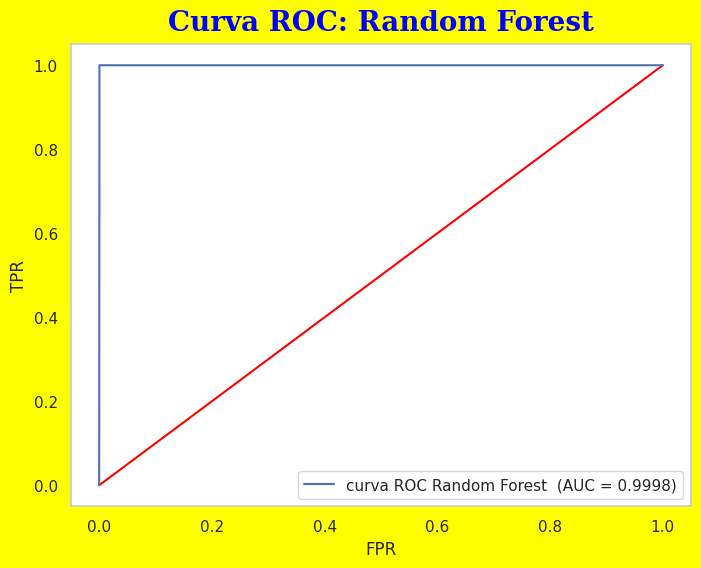

In [230]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Random Forest  (AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Random Forest',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

## 4.4 Naive Bayes

In [231]:
## Entrenando el modelo
model = GaussianNB()
model.fit(x_train_scaled, y_train)

GaussianNB()

In [232]:
y_pred = model.predict(x_test_scaled)

In [233]:
report = classification_report(y_test, y_pred, target_names=["No Fraude", "Fraude"], output_dict=True)
pd.DataFrame(report).style.background_gradient()

,No Fraude,Fraude,accuracy,macro avg,weighted avg
precision,1.000000,0.694446,0.779837,0.847223,0.847108
recall,0.559343,1.000000,0.779837,0.779671,0.779837
f1-score,0.717408,0.819673,0.779837,0.768541,0.768579
support,899325.000000,900675.000000,0.779837,1800000.000000,1800000.000000


In [234]:
## Calculamos la predicción de probabilidad para nuestros datos de prueba, esto nos servirá para los calculos de AUC-ROC
y_proba_test = model.predict_proba(x_test_scaled)[:,1]

In [235]:
## En este caso, sabemos que la clase 0 - No fraude y clase 1 - Fraude
## Calculamos las métricas para la clase 1
accuracy = accuracy_score(y_test, y_pred)
precision = report['Fraude']['precision']
recall = report['Fraude']['recall']
f1 = report['Fraude']['f1-score']
auc_roc = roc_auc_score(y_test,y_proba_test)
metricas_nb = []
metricas_nb.extend([accuracy,precision,recall,f1,auc_roc])
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:', recall)
print('F1-score:',f1)
print('AUC-ROC:',auc_roc)

Accuracy: 0.7798366666666666
Precision: 0.6944460507537189
Recall: 1.0
F1-score: 0.8196732500805408
AUC-ROC: 0.7796714202318406


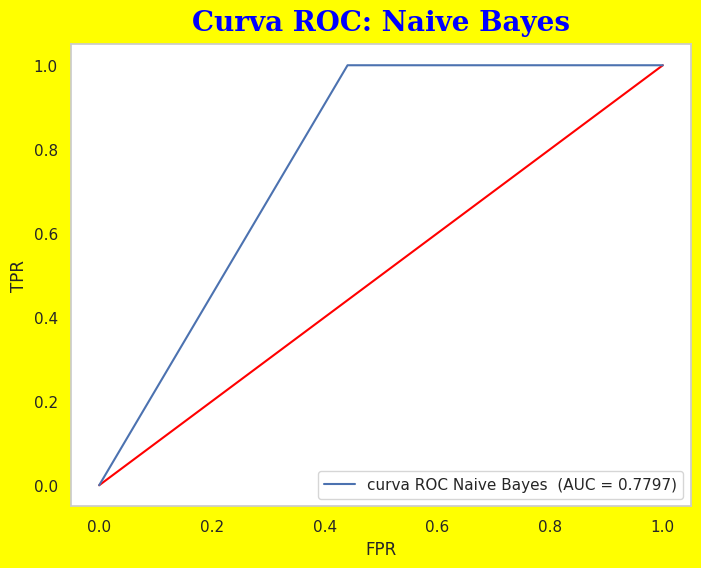

In [236]:
## Graficando nuestro curva ROC
auc_roc = roc_auc_score(y_test,y_proba_test)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Naive Bayes  (AUC = {auc_roc:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Naive Bayes',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

## 5. EVALUACIÓN Y SELECCIÓN DEL MODELO

In [237]:
modelos = ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'Naive Bayes']
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

In [238]:
## Creando el cuadro comparativo de métricas para nuestros modelos evaluados
comparativo_metricas = pd.DataFrame({
    'Métricas': metricas,
     modelos[0]: metricas_lr,
     modelos[1]: metricas_dt,
     modelos[2]: metricas_rf,
     modelos[3]: metricas_nb
})
comparativo_metricas.style.background_gradient()

,Métricas,Regresión Logística,Árbol de Decisión,Random Forest,Naive Bayes
0,Accuracy,0.861819,0.998955,0.998874,0.779837
1,Precision,0.853435,0.997916,0.997755,0.694446
2,Recall,0.873929,1.000000,1.000000,1.000000
3,F1-Score,0.863561,0.998957,0.998876,0.819673
4,AUC,0.936793,0.998957,0.999769,0.779671


In [239]:
## Cambiamos de un formato ancho a uno largo para poder graficar de mejor manera nuestros datos
comparativo_metricas.melt(id_vars='Métricas').style.background_gradient()

,Métricas,variable,value
0,Accuracy,Regresión Logística,0.861819
1,Precision,Regresión Logística,0.853435
2,Recall,Regresión Logística,0.873929
3,F1-Score,Regresión Logística,0.863561
4,AUC,Regresión Logística,0.936793
5,Accuracy,Árbol de Decisión,0.998955
6,Precision,Árbol de Decisión,0.997916
7,Recall,Árbol de Decisión,1.000000
8,F1-Score,Árbol de Decisión,0.998957
9,AUC,Árbol de Decisión,0.998957


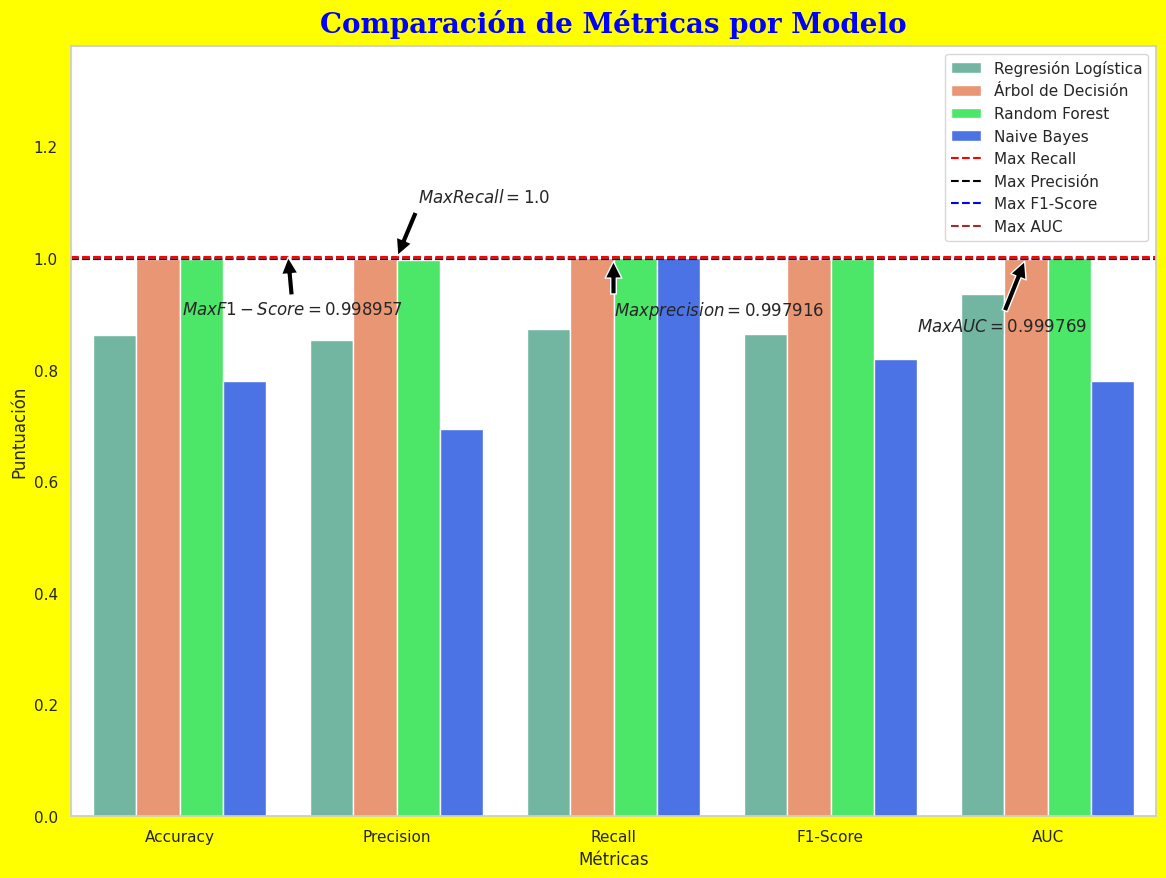

In [243]:
## Graficando la comparación de métricas entre nuestros modelos evaluados
plt.figure(figsize=(14, 10))
colors = ['#66c2a5', '#fc8d62',"#33FF57", "#3366FF"]
sns.barplot(data=comparativo_metricas.melt(id_vars='Métricas'), x='Métricas', y='value', hue='variable', palette=colors)
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
ax = plt.gca()  # Obtiene el objeto de los ejes
ax.set_ylim(bottom=0, top=1.38)
plt.axhline(y=1.002, color='red', linestyle='--', label='Max Recall')
plt.axhline(y=0.997916, color='black', linestyle='--', label='Max Precisión')
plt.axhline(y=0.998957, color='blue', linestyle='--', label='Max F1-Score')
plt.axhline(y=0.999769, color='brown', linestyle='--', label='Max AUC')
plt.annotate('$Max Recall = 1.0$', xy=(1, 1), xytext=(1.1, 1+0.1),fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max precision = 0.997916$', xy=(2, 0.997916), xytext=(2, 0.997916-0.1),fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max F1-Score = 0.998957$', xy=(0.5, 0.998957+0.007), xytext=(0.01, 0.998957-0.10),fontsize=12,
                                        arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max AUC = 0.999769$', xy=(3.9, 0.999769), xytext=(3.4, 0.999769-0.13),fontsize=12,
                                        arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Comparación de Métricas por Modelo', pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.legend();

## 5.1 Conclusiones de la evaluación

1. Regresión Logística:

 * Tiene un buen desempeño en términos de precisión y F1-Score, con valores de alrededor del 86%.
 * El valor de AUC es bueno, alrededor del 94%, lo que indica una buena capacidad del modelo para distinguir entre las clases. Buen rate entre falsos positivos y verdaderos positivos.
 * Sin embargo, el porcentaje de precisión es inferior al de otros modelos, como el Árbol de Decisión y el Random Forest.

2. Árbol de Decisión:

 * Tiene un rendimiento sobresaliente en todas las métricas, con valores superiores al 99%.
 * Su precisión, recall, y F1-Score son cercanos al 100%, lo que indica una clasificación casi perfecta.
 * El valor de AUC es alto, cercano al 100%, lo que sugiere una excelente capacidad de discriminación entre las clases. Pero es ligeramente menor al conseguido con el modelo Random Forest.

3. Random Forest:

 * Muestra un rendimiento similar al Árbol de Decisión en términos de precisión, recall y F1-Score, todos por encima del 99%. Muy ligeramente inferior en las métricas precisión, F1-score y accuracy del Árbol de Decisión.
 * Su AUC es ligeramente superior al del Árbol de Decisión, indicando una capacidad ligeramente mejor para distinguir entre las clases.
 * Es una opción sólida y estable debido a la naturaleza de ensemble del modelo.
 * El entrenamiento del modelo, requiere más memoria computacional, demora un poco más que los demás modelos.

4. Naive Bayes:

 * Aunque tiene un recall del 100%, indicando que no se pierden falsos negativos, sus otras métricas (precisión, F1-Score) son bastante más bajas que los demás modelos.
 * Su precisión es la más baja de todos los modelos, lo que indica una tendencia a clasificar incorrectamente casos positivos como negativos (falsos positivos).
 * El valor de AUC también es el más bajo de todos los modelos, lo cual nos indica que su capacidad para identificar correctamente las clases es baja.

> **En conclusión, tanto el Árbol de Decisión como el Random Forest muestran un rendimiento muy sobresaliente con respecto a los demás modelos evaluados. Las métricas conseguidas en estos dos modelos, son superiores al resto.**

> **El Árbol de Decisión parece ser ligeramente mejor en términos de precisión, accuracy y F1-score, pero el Random Forest ofrece un mejor valor en AUC. Por otro lado el Random forest debido a ser un modelo ensemble puede darnos una mayor estabilidad y robustez.**

> **Es así, que los dos modelos resultaron ser excelentes, si necesitamos mayor rapidez y un mayor rendimiento respecto a poder de computo, podriamos optar por el Árbol de Decisión, pero si por el contrario requerimos un modelo más estable y robusto, sin importar el poder de cómputo podríamos optar por el Random Forest.**